In [ ]:
import scanpy as sc
import pandas as pd
import matplotlib as mpl
import sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


import sys

sys.path.append("../src")

In [2]:
mpl.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['figure.dpi'] = 250
plt.rcParams['figure.figsize'] = (5, 5)
mpl.rcParams['font.family'] = 'sans-serif' 
mpl.rcParams['font.sans-serif'] = ['Helvetica']
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['text.usetex'] = False

In [ ]:
from constants import time_points
from utils import average_pairwise_euclidean_similarity, bootstrap_confidence_interval

In [28]:
adatas = {}
adatas_acaA = {}
adatas_acaA_pkaC = {}
adata_all = sc.read(filename=f"../data/processed/AX4.h5ad")
adata_acaA_all = sc.read(filename=f"../data/processed/acaA.h5ad")
adata_acaA_pkaC_all = sc.read(filename=f"../data/processed/acaA_pkaC.h5ad")

adata_all.obsm["X_pca"] = PCA(
    n_components=50,
    random_state=42,
).fit_transform(adata_all.X)
adata_acaA_all.obsm["X_pca"] = PCA(
    n_components=50,
    random_state=42,
).fit_transform(adata_acaA_all.X)
adata_acaA_pkaC_all.obsm["X_pca"] = PCA(
    n_components=50,
    random_state=42,
).fit_transform(adata_acaA_pkaC_all.X)
for tp in time_points:
    adatas[tp] = adata_all[adata_all.obs["time"] == tp]
    adatas_acaA[tp] = adata_acaA_all[adata_acaA_all.obs["time"] == tp]
    adatas_acaA_pkaC[tp] = adata_acaA_pkaC_all[adata_acaA_pkaC_all.obs["time"] == tp]

In [7]:
# TAKES 25 MIN
mean_distances = {
    "AX4": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
    },
    "AX4_psp": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
    },
    "AX4_pst": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
    },
    "acaA": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
        "mNeonG": {},
    },
    "acaA_pkaC": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_psp": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_pst": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
}

cell_counts = {
    "AX4": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
    },
    "AX4_psp": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
    },
    "AX4_pst": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
    },
    "acaA": {"all": {}, "act15GFP": {}, "mCherry": {}, "mCerulean": {}, "mNeonG": {}},
    "acaA_pkaC": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_psp": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_pst": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
}

median_genes = {
    "AX4": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
    },
    "AX4_psp": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
    },
    "AX4_pst": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
    },
    "acaA": {"all": {}, "act15GFP": {}, "mCherry": {}, "mCerulean": {}, "mNeonG": {}},
    "acaA_pkaC": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_psp": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_pst": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
}

total_reads = {
    "AX4": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
    },
    "AX4_psp": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
    },
    "AX4_pst": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
    },
    "acaA": {"all": {}, "act15GFP": {}, "mCherry": {}, "mCerulean": {}, "mNeonG": {}},
    "acaA_pkaC": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_psp": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_pst": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
}

CI_dict = {
    "AX4": {},
    "acaA": {},
    "acaA_pkaC": {},
    "AX4_psp": {},
    "AX4_pst": {},
    "acaA_pkaC_psp": {},
    "acaA_pkaC_pst": {},
}


print("AX4")
for tp in time_points:
    print(tp)
    mean_distances["AX4"][tp] = {}
    adata = adatas[tp]
    adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)
    adata.obs["total_reads"] = adata.X.sum(axis=1)

    # Mean cosine distance for all cells
    cell_vectors = adata.obsm["X_uce"]
    mean_vector = np.mean(cell_vectors, axis=0)
    mean_distances["AX4"]["all"][tp] = average_pairwise_euclidean_similarity(cell_vectors)
    cell_counts["AX4"]["all"][tp] = len(cell_vectors)
    median_genes["AX4"]["all"][tp] = np.median(adata.obs["n_genes"])
    total_reads["AX4"]["all"][tp] = np.sum(adata.obs["total_reads"])

    # Specific subsets (e.g., prespore/prestalk, markers)
    if tp in ["12hr", "16hr", "20hr"]:
        for cell_type in ["psp", "pst"]:
            subset = adata[adata.obs["cell_type"].str.contains(cell_type, na=False)]
            cell_vectors = subset.obsm["X_uce"]
            if len(cell_vectors) > 0:
                mean_distances[f"AX4_{cell_type}"]["all"][tp] = average_pairwise_euclidean_similarity(cell_vectors)
                cell_counts[f"AX4_{cell_type}"]["all"][tp] = len(subset)
                median_genes[f"AX4_{cell_type}"]["all"][tp] = np.median(
                    subset.obs["n_genes"]
                )
                total_reads[f"AX4_{cell_type}"]["all"][tp] = np.sum(
                    subset.obs["total_reads"]
                )

                for marker in ["act15GFP", "mCherry", "mCerulean"]:
                    subset2 = subset[subset.obs["marker"] == marker]
                    cell_vectors = subset2.obsm["X_uce"]
                    if len(cell_vectors) > 0:
                        mean_distances[f"AX4_{cell_type}"][marker][tp] = average_pairwise_euclidean_similarity(cell_vectors)
                        bootstrap_means.append(
                            mean_distances[f"AX4_{cell_type}"][marker][tp]
                        )
                    cell_counts[f"AX4_{cell_type}"][marker][tp] = len(subset2)
                    median_genes[f"AX4_{cell_type}"][marker][tp] = np.median(
                        subset2.obs["n_genes"]
                    )
                    total_reads[f"AX4_{cell_type}"][marker][tp] = np.sum(
                        subset2.obs["total_reads"]
                    )
                CI_dict[f"AX4_{cell_type}"][tp] = bootstrap_confidence_interval(bootstrap_means)

    bootstrap_means = []
    for marker in ["act15GFP", "mCherry", "mCerulean"]:
        subset = adata[adata.obs["marker"] == marker]
        cell_vectors = subset.obsm["X_uce"]
        if len(cell_vectors) > 0:
            mean_distances["AX4"][marker][tp] = average_pairwise_euclidean_similarity(cell_vectors)
            bootstrap_means.append(mean_distances["AX4"][marker][tp])
        cell_counts["AX4"][marker][tp] = len(subset)
        median_genes["AX4"][marker][tp] = np.median(subset.obs["n_genes"])
        total_reads["AX4"][marker][tp] = np.sum(subset.obs["total_reads"])
    CI_dict["AX4"][tp] = bootstrap_confidence_interval(bootstrap_means)

print("acaA")
# acaA-specific calculations
for tp in time_points:
    print(tp)
    adata = adatas_acaA[tp]
    adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)
    adata.obs["total_reads"] = adata.X.sum(axis=1)
    cell_vectors = adata.obsm["X_uce"]
    mean_vector = np.mean(adata.obsm["X_uce"], axis=0)
    mean_distances["acaA"]["all"][tp] = average_pairwise_euclidean_similarity(cell_vectors)
    cell_counts["acaA"]["all"][tp] = len(adata)
    median_genes["acaA"]["all"][tp] = np.median(adata.obs["n_genes"])
    total_reads["acaA"]["all"][tp] = np.sum(adata.obs["total_reads"])
    bootstrap_means = []
    for marker in ["act15GFP", "mCherry", "mCerulean", "mNeonG"]:
        subset = adata[adata.obs["marker"] == marker]
        cell_vectors = subset.obsm["X_uce"]
        if len(cell_vectors) > 0:
            mean_distances["acaA"][marker][tp] = average_pairwise_euclidean_similarity(cell_vectors)
            bootstrap_means.append(mean_distances["acaA"][marker][tp])
        cell_counts["acaA"][marker][tp] = len(subset)
        median_genes["acaA"][marker][tp] = np.median(subset.obs["n_genes"])
        total_reads["acaA"][marker][tp] = np.sum(subset.obs["total_reads"])
    CI_dict["acaA"][tp] = bootstrap_confidence_interval(bootstrap_means)

print("acaA_pkaC")
for tp in time_points:
    print(tp)
    adata = adatas_acaA_pkaC[tp]
    adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)
    adata.obs["total_reads"] = adata.X.sum(axis=1)
    cell_vectors = adata.obsm["X_uce"]
    mean_vector = np.mean(adata.obsm["X_uce"], axis=0)
    mean_distances["acaA_pkaC"]["all"][tp] = average_pairwise_euclidean_similarity(cell_vectors)
    cell_counts["acaA_pkaC"]["all"][tp] = len(adata)
    median_genes["acaA_pkaC"]["all"][tp] = np.median(adata.obs["n_genes"])
    total_reads["acaA_pkaC"]["all"][tp] = np.sum(adata.obs["total_reads"])
    if tp in ["12hr", "16hr", "20hr"]:
        for cell_type in ["psp", "pst"]:
            subset = adata[adata.obs["cell_type"].str.contains(cell_type, na=False)]
            cell_vectors = subset.obsm["X_uce"]
            if len(cell_vectors) > 0:
                mean_distances[f"acaA_pkaC_{cell_type}"]["all"][tp] = average_pairwise_euclidean_similarity(cell_vectors)
                cell_counts[f"acaA_pkaC_{cell_type}"]["all"][tp] = len(subset)
                median_genes[f"acaA_pkaC_{cell_type}"]["all"][tp] = np.median(
                    subset.obs["n_genes"]
                )
                total_reads[f"acaA_pkaC_{cell_type}"]["all"][tp] = np.sum(
                    subset.obs["total_reads"]
                )
                bootstrap_means = []
                for marker in ["r1", "r2", "r3"]:
                    subset2 = subset[subset.obs["marker"] == marker]
                    cell_vectors = subset2.obsm["X_uce"]
                    if len(cell_vectors) > 0:
                        mean_distances[f"acaA_pkaC_{cell_type}"][marker][tp] = average_pairwise_euclidean_similarity(cell_vectors)
                        bootstrap_means.append(
                            mean_distances[f"acaA_pkaC_{cell_type}"][marker][tp]
                        )
                    cell_counts[f"acaA_pkaC_{cell_type}"][marker][tp] = len(subset2)
                    median_genes[f"acaA_pkaC_{cell_type}"][marker][tp] = np.median(
                        subset2.obs["n_genes"]
                    )
                    total_reads[f"acaA_pkaC_{cell_type}"][marker][tp] = np.sum(
                        subset2.obs["total_reads"]
                    )
                CI_dict[f"acaA_pkaC_{cell_type}"][tp] = bootstrap_confidence_interval(bootstrap_means)

    bootstrap_means = []
    for marker in ["r1", "r2", "r3"]:
        subset = adata[adata.obs["marker"] == marker]
        cell_vectors = subset.obsm["X_uce"]
        if len(cell_vectors) > 0:
            mean_distances["acaA_pkaC"][marker][tp] = average_pairwise_euclidean_similarity(cell_vectors)
            bootstrap_means.append(mean_distances["acaA_pkaC"][marker][tp])
        cell_counts["acaA_pkaC"][marker][tp] = len(subset)
        median_genes["acaA_pkaC"][marker][tp] = np.median(subset.obs["n_genes"])
        total_reads["acaA_pkaC"][marker][tp] = np.sum(subset.obs["total_reads"])
    CI_dict["acaA_pkaC"][tp] = bootstrap_confidence_interval(bootstrap_means)

AX4
00hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:184: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


04hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:184: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


08hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:184: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


12hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:184: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


16hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:184: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


20hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:184: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


acaA
00hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:244: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


04hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:244: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


08hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:244: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


12hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:244: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


16hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:244: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


20hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:244: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


acaA_pkaC
00hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:268: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


04hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:268: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


08hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:268: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


12hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:268: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


16hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:268: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


20hr


/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/343429521.py:268: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


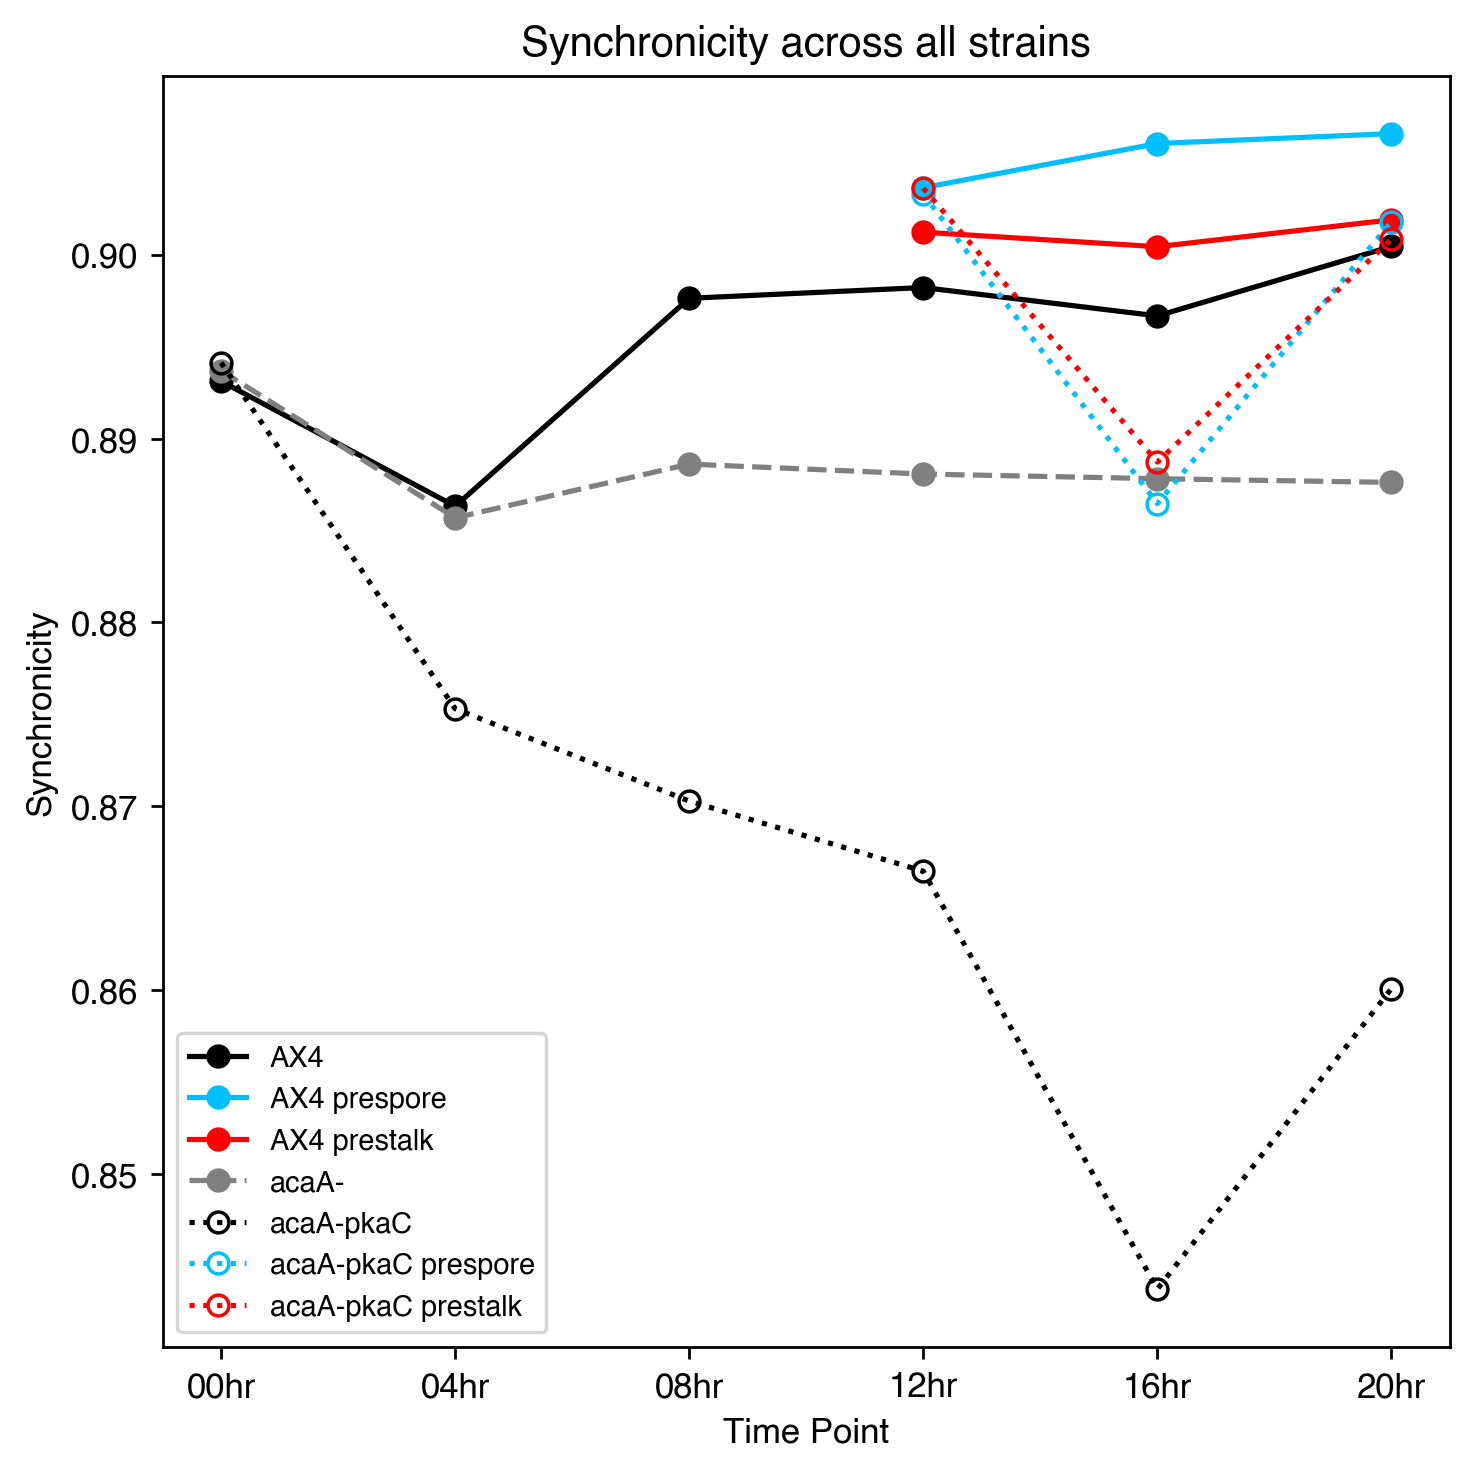

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


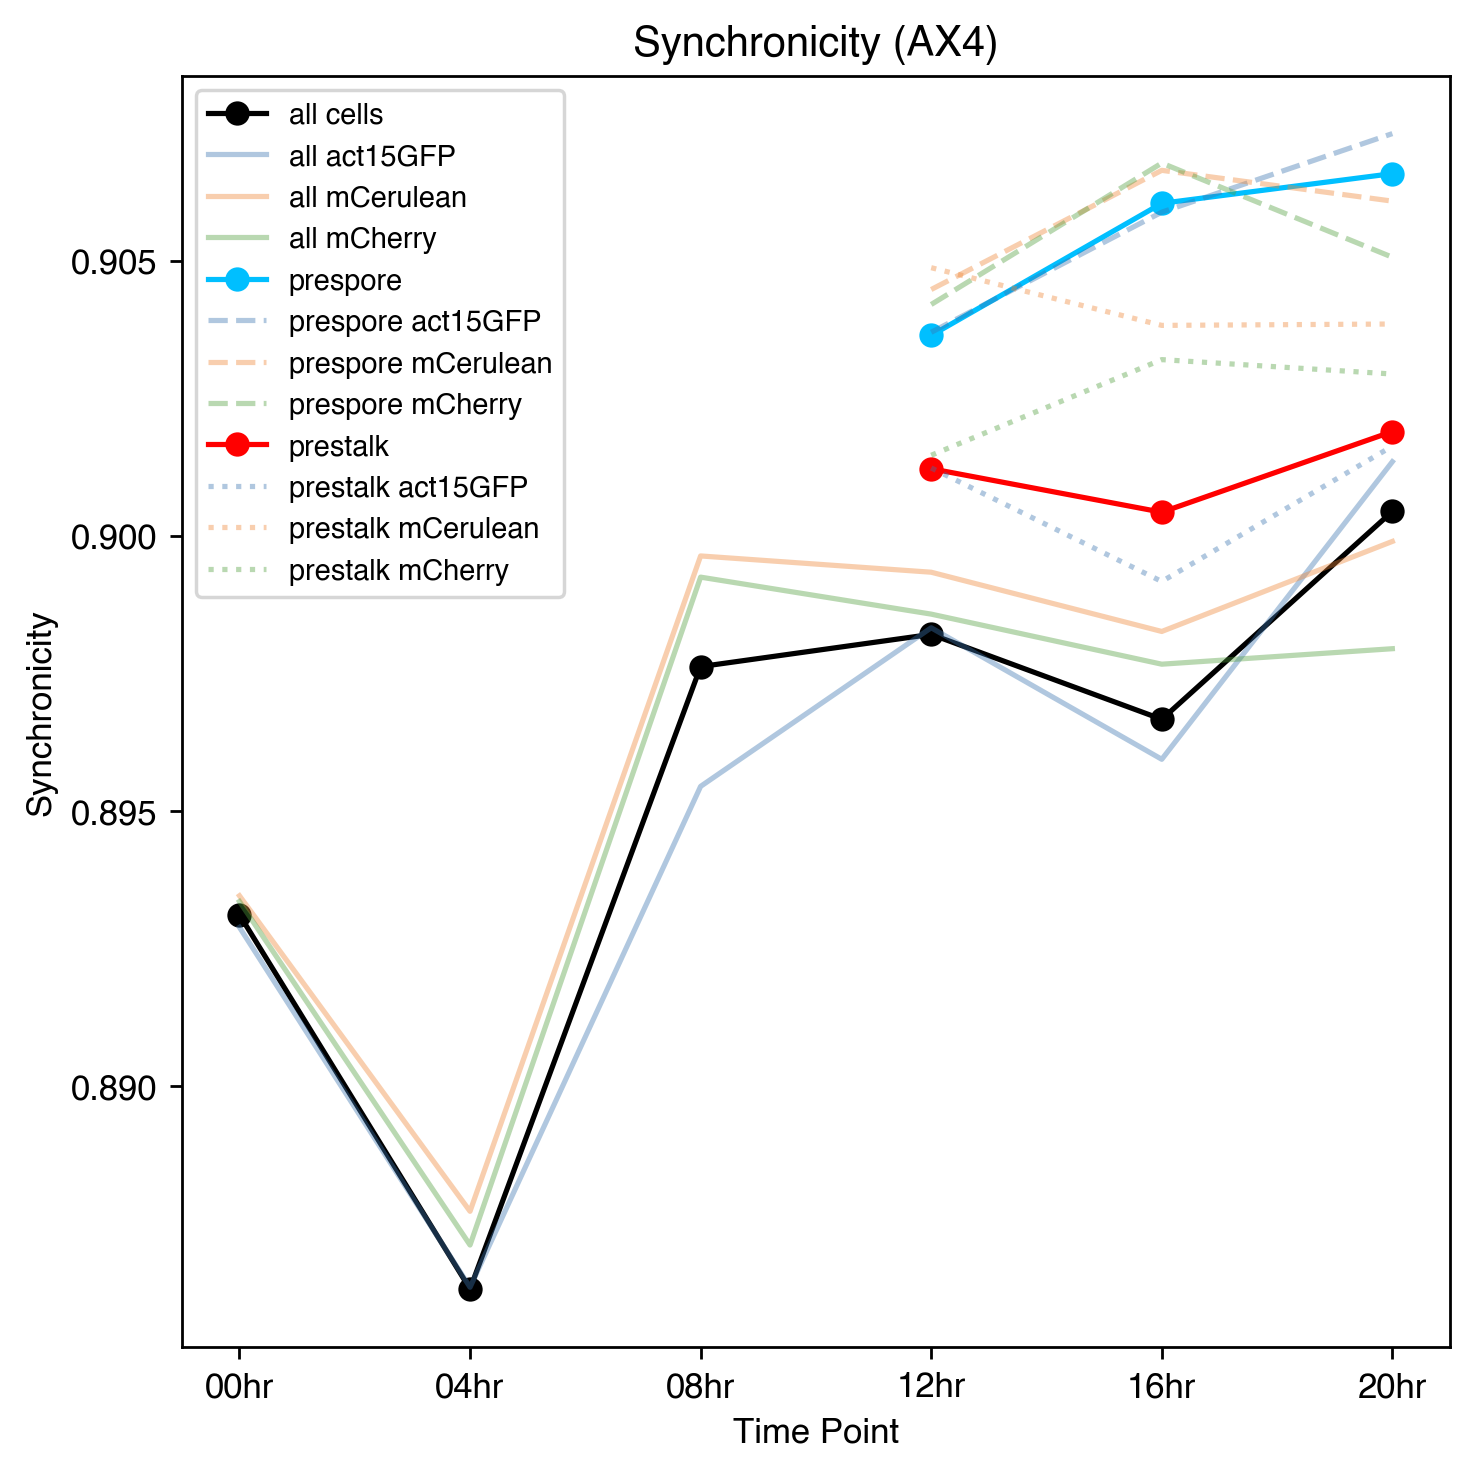

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


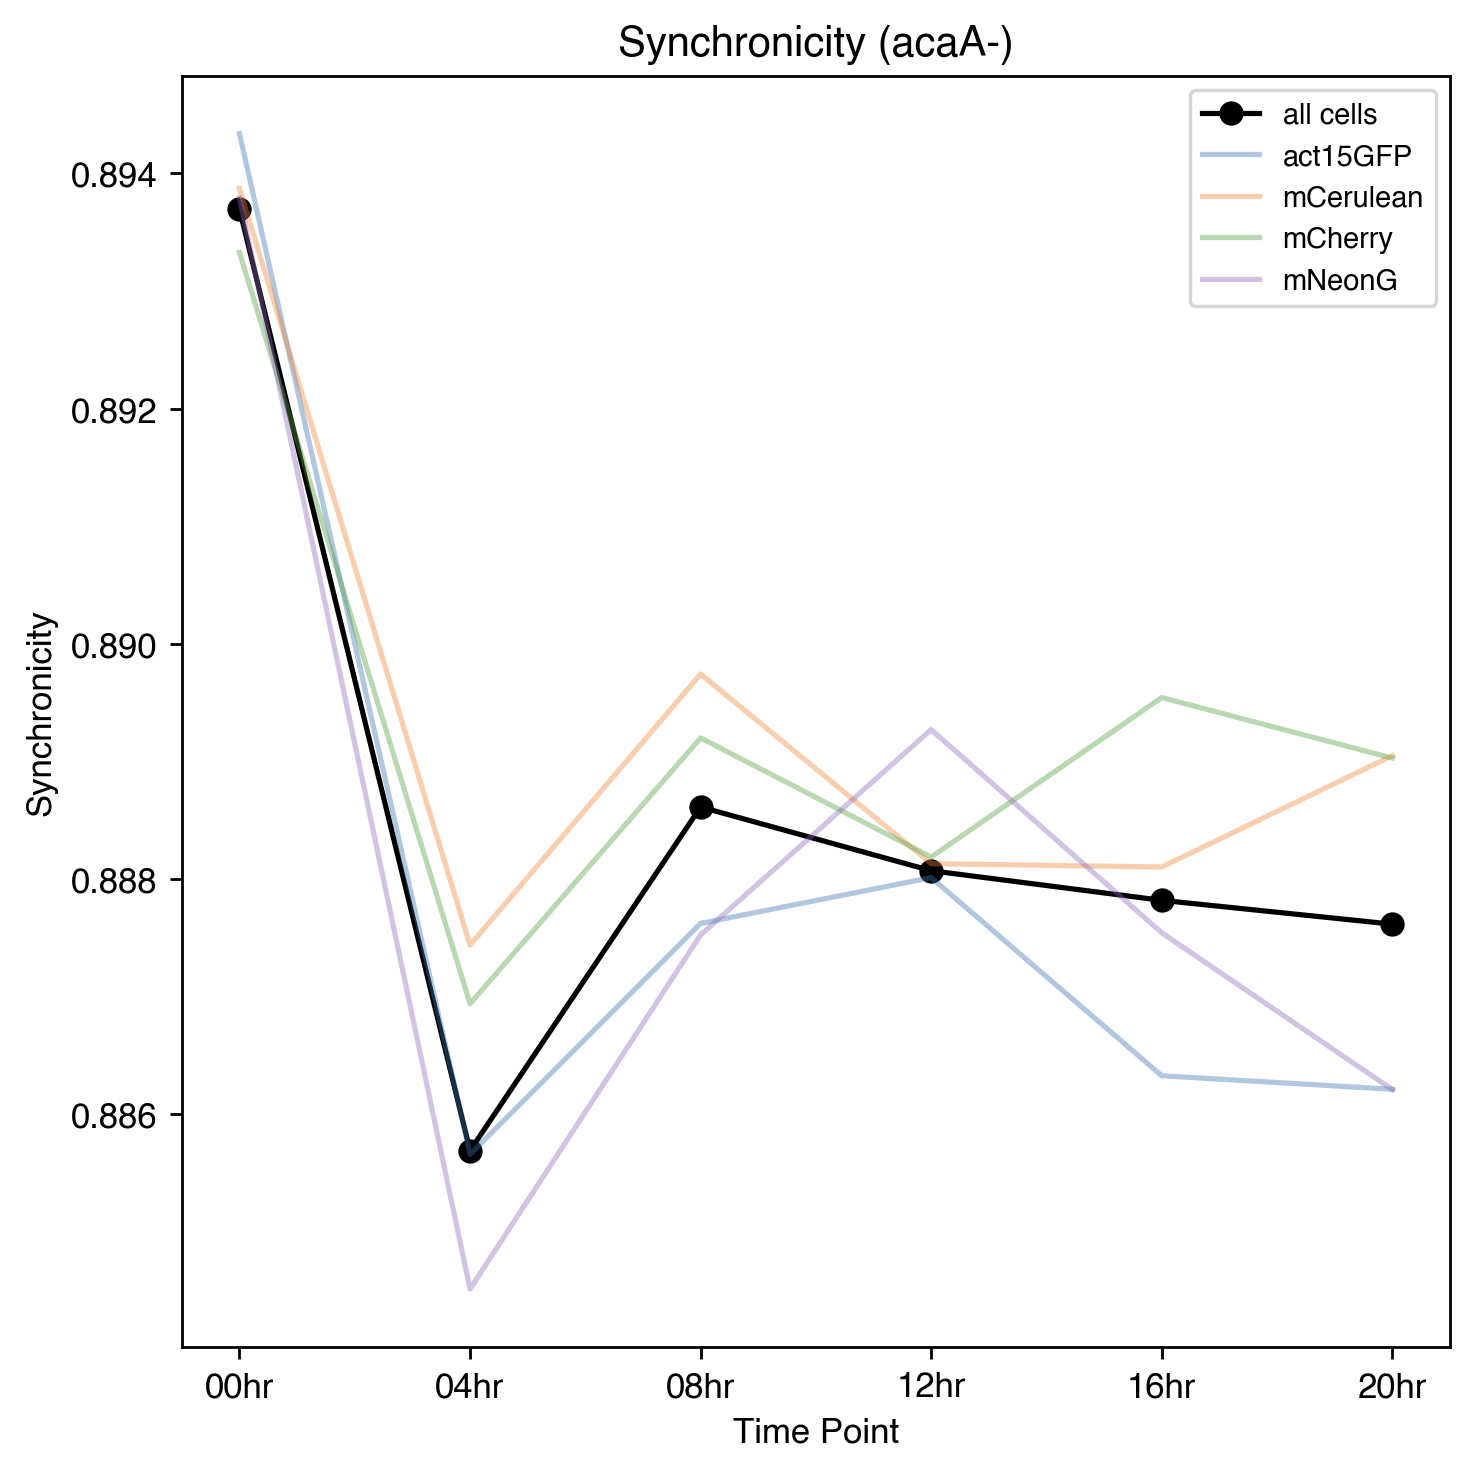

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


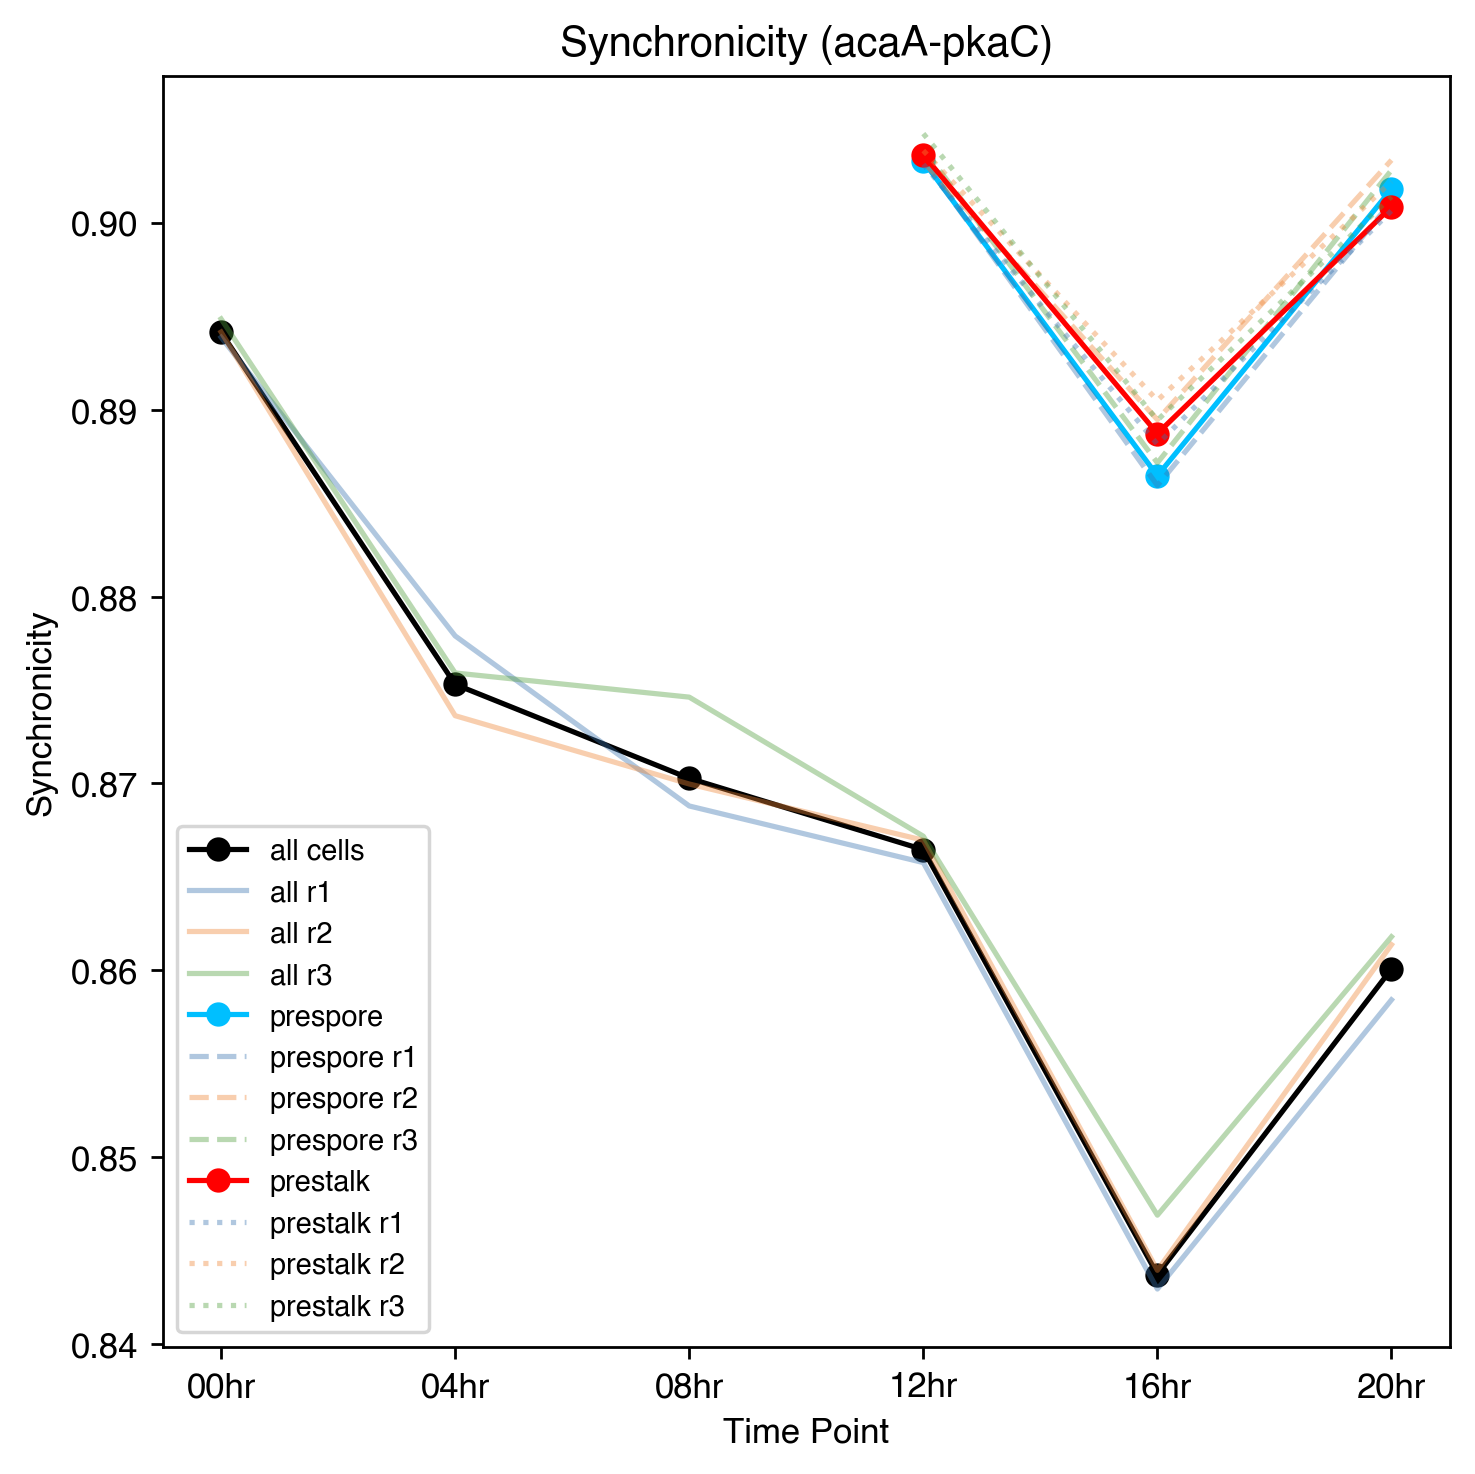

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(
    mean_distances["AX4"]["all"].keys(),
    mean_distances["AX4"]["all"].values(),
    label="AX4",
    color="black",
    marker="o",
)
ax.plot(
    mean_distances["AX4_psp"]["all"].keys(),
    mean_distances["AX4_psp"]["all"].values(),
    label=f"AX4 prespore",
    color="deepskyblue",
    marker="o",
)
ax.plot(
    mean_distances["AX4_pst"]["all"].keys(),
    mean_distances["AX4_pst"]["all"].values(),
    label=f"AX4 prestalk",
    color="red",
    marker="o",
)
ax.plot(
    mean_distances["acaA"]["all"].keys(),
    mean_distances["acaA"]["all"].values(),
    label="acaA-",
    linestyle="dashed",
    color="grey",
    marker="o",
)
ax.plot(
    mean_distances["acaA_pkaC"]["all"].keys(),
    mean_distances["acaA_pkaC"]["all"].values(),
    label="acaA-pkaC",
    color="black",
    marker="o",
    linestyle="dotted",
    markerfacecolor="none",
)
ax.plot(
    mean_distances["acaA_pkaC_psp"]["all"].keys(),
    mean_distances["acaA_pkaC_psp"]["all"].values(),
    label=f"acaA-pkaC prespore",
    color="deepskyblue",
    linestyle="dotted",
    marker="o",
    markerfacecolor="none",
)
ax.plot(
    mean_distances["acaA_pkaC_pst"]["all"].keys(),
    mean_distances["acaA_pkaC_pst"]["all"].values(),
    label=f"acaA-pkaC prestalk",
    color="red",
    linestyle="dotted",
    marker="o",
    markerfacecolor="none",
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Synchronicity")
ax.set_title("Synchronicity across all strains")
plt.legend(fontsize="small")
plt.tight_layout()
plt.savefig(f"../results/figures/synchronicity/all.png", dpi=300)
plt.savefig(f"../results/figures/synchronicity/all.pdf", dpi=300)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(
    mean_distances["AX4"]["all"].keys(),
    mean_distances["AX4"]["all"].values(),
    label="all cells",
    color="black",
    marker="o",
)
ax.plot(
    mean_distances["AX4"]["act15GFP"].keys(),
    mean_distances["AX4"]["act15GFP"].values(),
    label="all act15GFP",
    color="#3b75af",
    alpha=0.4,
)
ax.plot(
    mean_distances["AX4"]["mCerulean"].keys(),
    mean_distances["AX4"]["mCerulean"].values(),
    label="all mCerulean",
    color="#ef8636",
    alpha=0.4,
)
ax.plot(
    mean_distances["AX4"]["mCherry"].keys(),
    mean_distances["AX4"]["mCherry"].values(),
    label="all mCherry",
    color="#519e3e",
    alpha=0.4,
)
ax.plot(
    mean_distances["AX4_psp"]["all"].keys(),
    mean_distances["AX4_psp"]["all"].values(),
    label=f"prespore",
    color="deepskyblue",
    marker="o",
)
ax.plot(
    mean_distances["AX4_psp"]["act15GFP"].keys(),
    mean_distances["AX4_psp"]["act15GFP"].values(),
    label="prespore act15GFP",
    color="#3b75af",
    linestyle="dashed",
    alpha=0.4,
)
ax.plot(
    mean_distances["AX4_psp"]["mCerulean"].keys(),
    mean_distances["AX4_psp"]["mCerulean"].values(),
    label="prespore mCerulean",
    color="#ef8636",
    linestyle="dashed",
    alpha=0.4,
)
ax.plot(
    mean_distances["AX4_psp"]["mCherry"].keys(),
    mean_distances["AX4_psp"]["mCherry"].values(),
    label="prespore mCherry",
    color="#519e3e",
    linestyle="dashed",
    alpha=0.4,
)
ax.plot(
    mean_distances["AX4_pst"]["all"].keys(),
    mean_distances["AX4_pst"]["all"].values(),
    label=f"prestalk",
    color="red",
    marker="o",
)
ax.plot(
    mean_distances["AX4_pst"]["act15GFP"].keys(),
    mean_distances["AX4_pst"]["act15GFP"].values(),
    label="prestalk act15GFP",
    color="#3b75af",
    linestyle="dotted",
    alpha=0.4,
)
ax.plot(
    mean_distances["AX4_pst"]["mCerulean"].keys(),
    mean_distances["AX4_pst"]["mCerulean"].values(),
    label="prestalk mCerulean",
    color="#ef8636",
    linestyle="dotted",
    alpha=0.4,
)
ax.plot(
    mean_distances["AX4_pst"]["mCherry"].keys(),
    mean_distances["AX4_pst"]["mCherry"].values(),
    label="prestalk mCherry",
    color="#519e3e",
    linestyle="dotted",
    alpha=0.4,
)

ax.set_xlabel("Time Point")
ax.set_ylabel("Synchronicity")
ax.set_title("Synchronicity (AX4)")
plt.legend(fontsize="small")
plt.tight_layout()
plt.savefig(f"../results/figures/synchronicity/AX4.png", dpi=300)
plt.savefig(f"../results/figures/synchronicity/AX4.pdf", dpi=300)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(
    mean_distances["acaA"]["all"].keys(),
    mean_distances["acaA"]["all"].values(),
    label="all cells",
    color="black",
    marker="o",
)
ax.plot(
    mean_distances["acaA"]["act15GFP"].keys(),
    mean_distances["acaA"]["act15GFP"].values(),
    label="act15GFP",
    color="#3b75af",
    alpha=0.4,
)
ax.plot(
    mean_distances["acaA"]["mCerulean"].keys(),
    mean_distances["acaA"]["mCerulean"].values(),
    label="mCerulean",
    color="#ef8636",
    alpha=0.4,
)
ax.plot(
    mean_distances["acaA"]["mCherry"].keys(),
    mean_distances["acaA"]["mCherry"].values(),
    label="mCherry",
    color="#519e3e",
    alpha=0.4,
)
ax.plot(
    mean_distances["acaA"]["mNeonG"].keys(),
    mean_distances["acaA"]["mNeonG"].values(),
    label="mNeonG",
    color="#8d69b8",
    alpha=0.4,
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Synchronicity")
ax.set_title("Synchronicity (acaA-)")

plt.legend(fontsize="small")
plt.tight_layout()
plt.savefig(f"../results/figures/synchronicity/acaA.png", dpi=300)
plt.savefig(f"../results/figures/synchronicity/acaA.pdf", dpi=300)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(
    mean_distances["acaA_pkaC"]["all"].keys(),
    mean_distances["acaA_pkaC"]["all"].values(),
    label="all cells",
    color="black",
    marker="o",
)
ax.plot(
    mean_distances["acaA_pkaC"]["r1"].keys(),
    mean_distances["acaA_pkaC"]["r1"].values(),
    label="all r1",
    color="#3b75af",
    alpha=0.4,
)
ax.plot(
    mean_distances["acaA_pkaC"]["r2"].keys(),
    mean_distances["acaA_pkaC"]["r2"].values(),
    label="all r2",
    color="#ef8636",
    alpha=0.4,
)
ax.plot(
    mean_distances["acaA_pkaC"]["r3"].keys(),
    mean_distances["acaA_pkaC"]["r3"].values(),
    label="all r3",
    color="#519e3e",
    alpha=0.4,
)
ax.plot(
    mean_distances["acaA_pkaC_psp"]["all"].keys(),
    mean_distances["acaA_pkaC_psp"]["all"].values(),
    label=f"prespore",
    color="deepskyblue",
    marker="o",
)
ax.plot(
    mean_distances["acaA_pkaC_psp"]["r1"].keys(),
    mean_distances["acaA_pkaC_psp"]["r1"].values(),
    label="prespore r1",
    color="#3b75af",
    alpha=0.4,
    linestyle="dashed",
)
ax.plot(
    mean_distances["acaA_pkaC_psp"]["r2"].keys(),
    mean_distances["acaA_pkaC_psp"]["r2"].values(),
    label="prespore r2",
    color="#ef8636",
    alpha=0.4,
    linestyle="dashed",
)
ax.plot(
    mean_distances["acaA_pkaC_psp"]["r3"].keys(),
    mean_distances["acaA_pkaC_psp"]["r3"].values(),
    label="prespore r3",
    color="#519e3e",
    alpha=0.4,
    linestyle="dashed",
)
ax.plot(
    mean_distances["acaA_pkaC_pst"]["all"].keys(),
    mean_distances["acaA_pkaC_pst"]["all"].values(),
    label=f"prestalk",
    color="red",
    marker="o",
)
ax.plot(
    mean_distances["acaA_pkaC_pst"]["r1"].keys(),
    mean_distances["acaA_pkaC_pst"]["r1"].values(),
    label="prestalk r1",
    color="#3b75af",
    alpha=0.4,
    linestyle="dotted",
)
ax.plot(
    mean_distances["acaA_pkaC_pst"]["r2"].keys(),
    mean_distances["acaA_pkaC_pst"]["r2"].values(),
    label="prestalk r2",
    color="#ef8636",
    alpha=0.4,
    linestyle="dotted",
)
ax.plot(
    mean_distances["acaA_pkaC_pst"]["r3"].keys(),
    mean_distances["acaA_pkaC_pst"]["r3"].values(),
    label="prestalk r3",
    color="#519e3e",
    alpha=0.4,
    linestyle="dotted",
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Synchronicity")
ax.set_title("Synchronicity (acaA-pkaC)")

plt.legend(fontsize="small")
plt.tight_layout()
plt.savefig(f"../results/figures/synchronicity/acaA_pkaC.png", dpi=300)
plt.savefig(f"../results/figures/synchronicity/acaA_pkaC.pdf", dpi=300)
plt.show()

In [10]:
from scipy.stats import ttest_ind, mannwhitneyu

group1 = [mean_distances["AX4"]["act15GFP"]["12hr"], mean_distances["AX4"]["mCherry"]["12hr"], mean_distances["AX4"]["mCerulean"]["12hr"]]
group2 = [mean_distances["AX4"]["act15GFP"]["08hr"], mean_distances["AX4"]["mCherry"]["08hr"], mean_distances["AX4"]["mCerulean"]["08hr"]]
    
    # Parametric test (two-sample t-test). 
    # Use 'equal_var=False' for Welch's t-test if variances differ:
t_stat, p_val_ttest = ttest_ind(group1, group2, equal_var=True)

# Non-parametric test (Mann-Whitney U)
u_stat, p_val_mann = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"t-test p-value: {p_val_ttest:.10f}")
print(f"Mann-Whitney U p-value: {p_val_mann:.10f}")

t-test p-value: 0.6656924342
Mann-Whitney U p-value: 1.0000000000


In [11]:
from scipy.stats import ttest_ind, mannwhitneyu
p_values_dict = {}
strains = ["AX4", "acaA", "acaA_pkaC"]
for h in range(3):
    if strains[h] not in p_values_dict:
        p_values_dict[strains[h]] = {}
    for j in range(h, 3):
        if strains[j] not in p_values_dict[strains[h]]:
            p_values_dict[strains[h]][strains[j]] = {}
        for k in range(0, len(time_points)):
            if time_points[k] not in p_values_dict[strains[h]][strains[j]]:
                p_values_dict[strains[h]][strains[j]][time_points[k]] = {}
            for l in range(k, len(time_points)):
                # Original groups
                replicates1 = [r for r in mean_distances[strains[h]] if r not in ["all", "00hr", "04hr", "08hr", "12hr", "16hr", "20hr"]]
                group1 = [mean_distances[strains[h]][r][time_points[k]] for r in replicates1]
                replicates2 = [r for r in mean_distances[strains[j]] if r not in ["all", "00hr", "04hr", "08hr", "12hr", "16hr", "20hr"]]
                group2 = [mean_distances[strains[j]][r][time_points[l]] for r in replicates2]
                t_stat, p_val_ttest = ttest_ind(group1, group2, equal_var=True)
                p_values_dict[strains[h]][strains[j]][time_points[k]][time_points[l]] = p_val_ttest
                print(f"{strains[h]} vs {strains[j]} at {time_points[k]} vs {time_points[l]}: {p_val_ttest:.10f}")
            print()

AX4 vs AX4 at 00hr vs 00hr: 1.0000000000
AX4 vs AX4 at 00hr vs 04hr: 0.0001450777
AX4 vs AX4 at 00hr vs 08hr: 0.0223916819
AX4 vs AX4 at 00hr vs 12hr: 0.0000961589
AX4 vs AX4 at 00hr vs 16hr: 0.0048521200
AX4 vs AX4 at 00hr vs 20hr: 0.0028951345

AX4 vs AX4 at 04hr vs 04hr: 1.0000000000
AX4 vs AX4 at 04hr vs 08hr: 0.0013733934
AX4 vs AX4 at 04hr vs 12hr: 0.0000201067
AX4 vs AX4 at 04hr vs 16hr: 0.0002187040
AX4 vs AX4 at 04hr vs 20hr: 0.0002830689

AX4 vs AX4 at 08hr vs 08hr: 1.0000000000
AX4 vs AX4 at 08hr vs 12hr: 0.6656924342
AX4 vs AX4 at 08hr vs 16hr: 0.6149368504
AX4 vs AX4 at 08hr vs 20hr: 0.3840212131

AX4 vs AX4 at 12hr vs 12hr: 1.0000000000
AX4 vs AX4 at 12hr vs 16hr: 0.1273326901
AX4 vs AX4 at 12hr vs 20hr: 0.3940612283

AX4 vs AX4 at 16hr vs 16hr: 1.0000000000
AX4 vs AX4 at 16hr vs 20hr: 0.1128928739

AX4 vs AX4 at 20hr vs 20hr: 1.0000000000

AX4 vs acaA at 00hr vs 00hr: 0.0929883225
AX4 vs acaA at 00hr vs 04hr: 0.0002892720
AX4 vs acaA at 00hr vs 08hr: 0.0009423066
AX4 vs 

In [12]:
# Create a multi-index DataFrame structure
index = pd.MultiIndex.from_product([strains, time_points], names=["Strain", "Time"])
columns = pd.MultiIndex.from_product([strains, time_points], names=["Comparison Strain", "Comparison Time"])

# Initialize an empty DataFrame
p_values_df = pd.DataFrame(index=index, columns=columns)

# Fill the DataFrame with p-values
for strain_1 in strains:
    for strain_2 in strains:
        for time_point1 in time_points:
            for time_point2 in time_points:
                p_value = p_values_dict.get(strain_1, {}).get(strain_2, {}).get(time_point1, {}).get(time_point2, np.nan)
                if p_value == 0:
                    formatted_p_value = "0.00"
                elif p_value < 0.001:
                    formatted_p_value = f"{p_value:.2e}"
                else:
                    formatted_p_value = f"{p_value:.2f}"
                p_values_df.loc[(strain_1, time_point1), (strain_2, time_point2)] = formatted_p_value

# Display the formatted DataFrame

In [13]:
p_values_df

Comparison Strain   AX4                                                acaA  \
Comparison Time    00hr      04hr  08hr      12hr      16hr      20hr  00hr   
Strain    Time                                                                
AX4       00hr     1.00  1.45e-04  0.02  9.62e-05      0.00      0.00  0.09   
          04hr      nan      1.00  0.00  2.01e-05  2.19e-04  2.83e-04   nan   
          08hr      nan       nan  1.00      0.67      0.61      0.38   nan   
          12hr      nan       nan   nan      1.00      0.13      0.39   nan   
          16hr      nan       nan   nan       nan      1.00      0.11   nan   
          20hr      nan       nan   nan       nan       nan      1.00   nan   
acaA      00hr      nan       nan   nan       nan       nan       nan  1.00   
          04hr      nan       nan   nan       nan       nan       nan   nan   
          08hr      nan       nan   nan       nan       nan       nan   nan   
          12hr      nan       nan   nan       nan       nan       nan   nan   
          16hr      nan       nan   nan       nan       nan       nan   nan   
          20hr      nan       nan   nan       nan       nan       nan   nan   
acaA_pkaC 00hr      nan       nan   nan       nan       nan       nan   nan   
          04hr      nan       nan   nan       nan       nan       nan   nan   
          08hr      nan       nan   nan       nan       nan       nan   nan   
          12hr      nan       nan   nan       nan       nan       nan   nan   
          16hr      nan       nan   nan       nan       nan       nan   nan   
          20hr      nan       nan   nan       nan       nan       nan   nan   

Comparison Strain                                                   acaA_pkaC  \
Comparison Time        04hr      08hr      12hr      16hr      20hr      00hr   
Strain    Time                                                                  
AX4       00hr     2.89e-04  9.42e-04  5.05e-05      0.00      0.00      0.04   
          04hr         0.32      0.11      0.04      0.39      0.61       nan   
          08hr          nan  7.15e-04  4.14e-04  6.74e-04  8.58e-04       nan   
          12hr          nan       nan  2.28e-06  4.60e-05  1.02e-04       nan   
          16hr          nan       nan       nan  2.08e-04  3.56e-04       nan   
          20hr          nan       nan       nan       nan  2.14e-04       nan   
acaA      00hr     3.11e-05  1.12e-04  5.20e-06  1.43e-04  3.20e-04      0.24   
          04hr         1.00      0.03      0.02      0.11      0.21       nan   
          08hr          nan      1.00      0.85      0.49      0.40       nan   
          12hr          nan       nan      1.00      0.50      0.41       nan   
          16hr          nan       nan       nan      1.00      0.82       nan   
          20hr          nan       nan       nan       nan      1.00       nan   
acaA_pkaC 00hr          nan       nan       nan       nan       nan      1.00   
          04hr          nan       nan       nan       nan       nan       nan   
          08hr          nan       nan       nan       nan       nan       nan   
          12hr          nan       nan       nan       nan       nan       nan   
          16hr          nan       nan       nan       nan       nan       nan   
          20hr          nan       nan       nan       nan       nan       nan   

Comparison Strain                                                    
Comparison Time        04hr      08hr      12hr      16hr      20hr  
Strain    Time                                                       
AX4       00hr     1.51e-04  2.45e-04  6.00e-07  2.21e-06  6.96e-06  
          04hr     9.68e-04  9.41e-04  4.25e-06  4.50e-06  1.97e-05  
          08hr          nan  2.65e-04  2.36e-05  7.40e-06  2.51e-05  
          12hr          nan       nan  4.58e-07  1.56e-06  4.14e-06  
          16hr          nan       nan       nan  2.77e-06  8.45e-06  
          20hr          nan       nan       nan       nan  1.10e-05  
acaA    

In [14]:
from scipy.stats import ttest_ind, mannwhitneyu
p_values_dict = {}
strains = ["AX4", "AX4_psp", "AX4_pst"]
for h in range(len(strains)):
    if strains[h] not in p_values_dict:
        p_values_dict[strains[h]] = {}
    for j in range(h, len(strains)):
        if strains[j] not in p_values_dict[strains[h]]:
            p_values_dict[strains[h]][strains[j]] = {}
        for k in range(3, len(time_points)):
            if time_points[k] not in p_values_dict[strains[h]][strains[j]]:
                p_values_dict[strains[h]][strains[j]][time_points[k]] = {}
            for l in range(k, len(time_points)):
                # Original groups
                replicates1 = [r for r in mean_distances[strains[h]] if r not in ["all", "00hr", "04hr", "08hr", "12hr", "16hr", "20hr"]]
                group1 = [mean_distances[strains[h]][r][time_points[k]] for r in replicates1]
                replicates2 = [r for r in mean_distances[strains[j]] if r not in ["all", "00hr", "04hr", "08hr", "12hr", "16hr", "20hr"]]
                group2 = [mean_distances[strains[j]][r][time_points[l]] for r in replicates2]
                t_stat, p_val_ttest = ttest_ind(group1, group2, equal_var=True)
                p_values_dict[strains[h]][strains[j]][time_points[k]][time_points[l]] = p_val_ttest
                print(f"{strains[h]} vs {strains[j]} at {time_points[k]} vs {time_points[l]}: {p_val_ttest:.10f}")
            print()

AX4 vs AX4 at 12hr vs 12hr: 1.0000000000
AX4 vs AX4 at 12hr vs 16hr: 0.1273326901
AX4 vs AX4 at 12hr vs 20hr: 0.3940612283

AX4 vs AX4 at 16hr vs 16hr: 1.0000000000
AX4 vs AX4 at 16hr vs 20hr: 0.1128928739

AX4 vs AX4 at 20hr vs 20hr: 1.0000000000

AX4 vs AX4_psp at 12hr vs 12hr: 0.0001440534
AX4 vs AX4_psp at 12hr vs 16hr: 0.0000485628
AX4 vs AX4_psp at 12hr vs 20hr: 0.0004964139

AX4 vs AX4_psp at 16hr vs 16hr: 0.0002600346
AX4 vs AX4_psp at 16hr vs 20hr: 0.0007423874

AX4 vs AX4_psp at 20hr vs 20hr: 0.0055301628

AX4 vs AX4_pst at 12hr vs 12hr: 0.0359794869
AX4 vs AX4_pst at 12hr vs 16hr: 0.0899634427
AX4 vs AX4_pst at 12hr vs 20hr: 0.0046914069

AX4 vs AX4_pst at 16hr vs 16hr: 0.0417739482
AX4 vs AX4_pst at 16hr vs 20hr: 0.0043569498

AX4 vs AX4_pst at 20hr vs 20hr: 0.0592061324

AX4_psp vs AX4_psp at 12hr vs 12hr: 1.0000000000
AX4_psp vs AX4_psp at 12hr vs 16hr: 0.0030306442
AX4_psp vs AX4_psp at 12hr vs 20hr: 0.0422812002

AX4_psp vs AX4_psp at 16hr vs 16hr: 1.0000000000
AX4_psp 

In [15]:
# Create a multi-index DataFrame structure
index = pd.MultiIndex.from_product([strains, time_points[3:]], names=["Strain", "Time"])
columns = pd.MultiIndex.from_product([strains, time_points[3:]], names=["Comparison Strain", "Comparison Time"])

# Initialize an empty DataFrame
p_values_df = pd.DataFrame(index=index, columns=columns)

# Fill the DataFrame with p-values
for strain_1 in strains:
    for strain_2 in strains:
        for time_point1 in time_points[3:]:
            for time_point2 in time_points[3:]:
                p_value = p_values_dict.get(strain_1, {}).get(strain_2, {}).get(time_point1, {}).get(time_point2, np.nan)
                if p_value == 0:
                    formatted_p_value = "0.00"
                elif p_value < 0.001:
                    formatted_p_value = f"{p_value:.2e}"
                else:
                    formatted_p_value = f"{p_value:.2f}"
                p_values_df.loc[(strain_1, time_point1), (strain_2, time_point2)] = formatted_p_value

# Display the formatted DataFrame

In [16]:
p_values_df

Comparison Strain   AX4               AX4_psp                     AX4_pst  \
Comparison Time    12hr  16hr  20hr      12hr      16hr      20hr    12hr   
Strain  Time                                                                
AX4     12hr       1.00  0.13  0.39  1.44e-04  4.86e-05  4.96e-04    0.04   
        16hr        nan  1.00  0.11       nan  2.60e-04  7.42e-04     nan   
        20hr        nan   nan  1.00       nan       nan      0.01     nan   
AX4_psp 12hr        nan   nan   nan      1.00      0.00      0.04    0.25   
        16hr        nan   nan   nan       nan      1.00      0.71     nan   
        20hr        nan   nan   nan       nan       nan      1.00     nan   
AX4_pst 12hr        nan   nan   nan       nan       nan       nan    1.00   
        16hr        nan   nan   nan       nan       nan       nan     nan   
        20hr        nan   nan   nan       nan       nan       nan     nan   

Comparison Strain              
Comparison Time    16hr  20hr  
Strain  Time                   
AX4     12hr       0.09  0.00  
        16hr       0.04  0.00  
        20hr        nan  0.06  
AX4_psp 12hr       0.24  0.13  
        16hr       0.04  0.01  
        20hr        nan  0.02  
AX4_pst 12hr       0.82  0.84  
        16hr       1.00  0.67  
        20hr        nan  1.00

In [17]:
from scipy.stats import ttest_ind, mannwhitneyu
p_values_dict = {}
strains = ["acaA_pkaC", "acaA_pkaC_psp", "acaA_pkaC_pst"]
for h in range(len(strains)):
    if strains[h] not in p_values_dict:
        p_values_dict[strains[h]] = {}
    for j in range(h, len(strains)):
        if strains[j] not in p_values_dict[strains[h]]:
            p_values_dict[strains[h]][strains[j]] = {}
        for k in range(3, len(time_points)):
            if time_points[k] not in p_values_dict[strains[h]][strains[j]]:
                p_values_dict[strains[h]][strains[j]][time_points[k]] = {}
            for l in range(k, len(time_points)):
                # Original groups
                replicates1 = [r for r in mean_distances[strains[h]] if r not in ["all", "00hr", "04hr", "08hr", "12hr", "16hr", "20hr"]]
                group1 = [mean_distances[strains[h]][r][time_points[k]] for r in replicates1]
                replicates2 = [r for r in mean_distances[strains[j]] if r not in ["all", "00hr", "04hr", "08hr", "12hr", "16hr", "20hr"]]
                group2 = [mean_distances[strains[j]][r][time_points[l]] for r in replicates2]
                t_stat, p_val_ttest = ttest_ind(group1, group2, equal_var=True)
                p_values_dict[strains[h]][strains[j]][time_points[k]][time_points[l]] = p_val_ttest
                print(f"{strains[h]} vs {strains[j]} at {time_points[k]} vs {time_points[l]}: {p_val_ttest:.10f}")
            print()

acaA_pkaC vs acaA_pkaC at 12hr vs 12hr: 1.0000000000
acaA_pkaC vs acaA_pkaC at 12hr vs 16hr: 0.0000637446
acaA_pkaC vs acaA_pkaC at 12hr vs 20hr: 0.0060230227

acaA_pkaC vs acaA_pkaC at 16hr vs 16hr: 1.0000000000
acaA_pkaC vs acaA_pkaC at 16hr vs 20hr: 0.0005595580

acaA_pkaC vs acaA_pkaC at 20hr vs 20hr: 1.0000000000

acaA_pkaC vs acaA_pkaC_psp at 12hr vs 12hr: 0.0000001902
acaA_pkaC vs acaA_pkaC_psp at 12hr vs 16hr: 0.0000490418
acaA_pkaC vs acaA_pkaC_psp at 12hr vs 20hr: 0.0000015041

acaA_pkaC vs acaA_pkaC_psp at 16hr vs 16hr: 0.0000107169
acaA_pkaC vs acaA_pkaC_psp at 16hr vs 20hr: 0.0000018420

acaA_pkaC vs acaA_pkaC_psp at 20hr vs 20hr: 0.0000048001

acaA_pkaC vs acaA_pkaC_pst at 12hr vs 12hr: 0.0000005449
acaA_pkaC vs acaA_pkaC_pst at 12hr vs 16hr: 0.0000095437
acaA_pkaC vs acaA_pkaC_pst at 12hr vs 20hr: 0.0000006335

acaA_pkaC vs acaA_pkaC_pst at 16hr vs 16hr: 0.0000051840
acaA_pkaC vs acaA_pkaC_pst at 16hr vs 20hr: 0.0000014830

acaA_pkaC vs acaA_pkaC_pst at 20hr vs 20hr: 0.0

In [18]:
# Create a multi-index DataFrame structure
index = pd.MultiIndex.from_product([strains, time_points[3:]], names=["Strain", "Time"])
columns = pd.MultiIndex.from_product([strains, time_points[3:]], names=["Comparison Strain", "Comparison Time"])

# Initialize an empty DataFrame
p_values_df = pd.DataFrame(index=index, columns=columns)

# Fill the DataFrame with p-values
for strain_1 in strains:
    for strain_2 in strains:
        for time_point1 in time_points[3:]:
            for time_point2 in time_points[3:]:
                p_value = p_values_dict.get(strain_1, {}).get(strain_2, {}).get(time_point1, {}).get(time_point2, np.nan)
                if p_value == 0:
                    formatted_p_value = "0.00"
                elif p_value < 0.001:
                    formatted_p_value = f"{p_value:.2e}"
                else:
                    formatted_p_value = f"{p_value:.2f}"
                p_values_df.loc[(strain_1, time_point1), (strain_2, time_point2)] = formatted_p_value

# Display the formatted DataFrame

In [19]:
p_values_df

Comparison Strain  acaA_pkaC                     acaA_pkaC_psp            \
Comparison Time         12hr      16hr      20hr          12hr      16hr   
Strain        Time                                                         
acaA_pkaC     12hr      1.00  6.37e-05      0.01      1.90e-07  4.90e-05   
              16hr       nan      1.00  5.60e-04           nan  1.07e-05   
              20hr       nan       nan      1.00           nan       nan   
acaA_pkaC_psp 12hr       nan       nan       nan          1.00  1.10e-04   
              16hr       nan       nan       nan           nan      1.00   
              20hr       nan       nan       nan           nan       nan   
acaA_pkaC_pst 12hr       nan       nan       nan           nan       nan   
              16hr       nan       nan       nan           nan       nan   
              20hr       nan       nan       nan           nan       nan   

Comparison Strain            acaA_pkaC_pst                      
Comparison Time         20hr          12hr      16hr      20hr  
Strain        Time                                              
acaA_pkaC     12hr  1.50e-06      5.45e-07  9.54e-06  6.34e-07  
              16hr  1.84e-06           nan  5.18e-06  1.48e-06  
              20hr  4.80e-06           nan       nan  3.76e-06  
acaA_pkaC_psp 12hr      0.19          0.51  3.81e-05      0.01  
              16hr  2.66e-04           nan      0.21  2.47e-04  
              20hr      1.00           nan       nan      0.28  
acaA_pkaC_pst 12hr       nan          1.00  6.17e-05      0.02  
              16hr       nan           nan      1.00  1.21e-04  
              20hr       nan           nan       nan      1.00

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


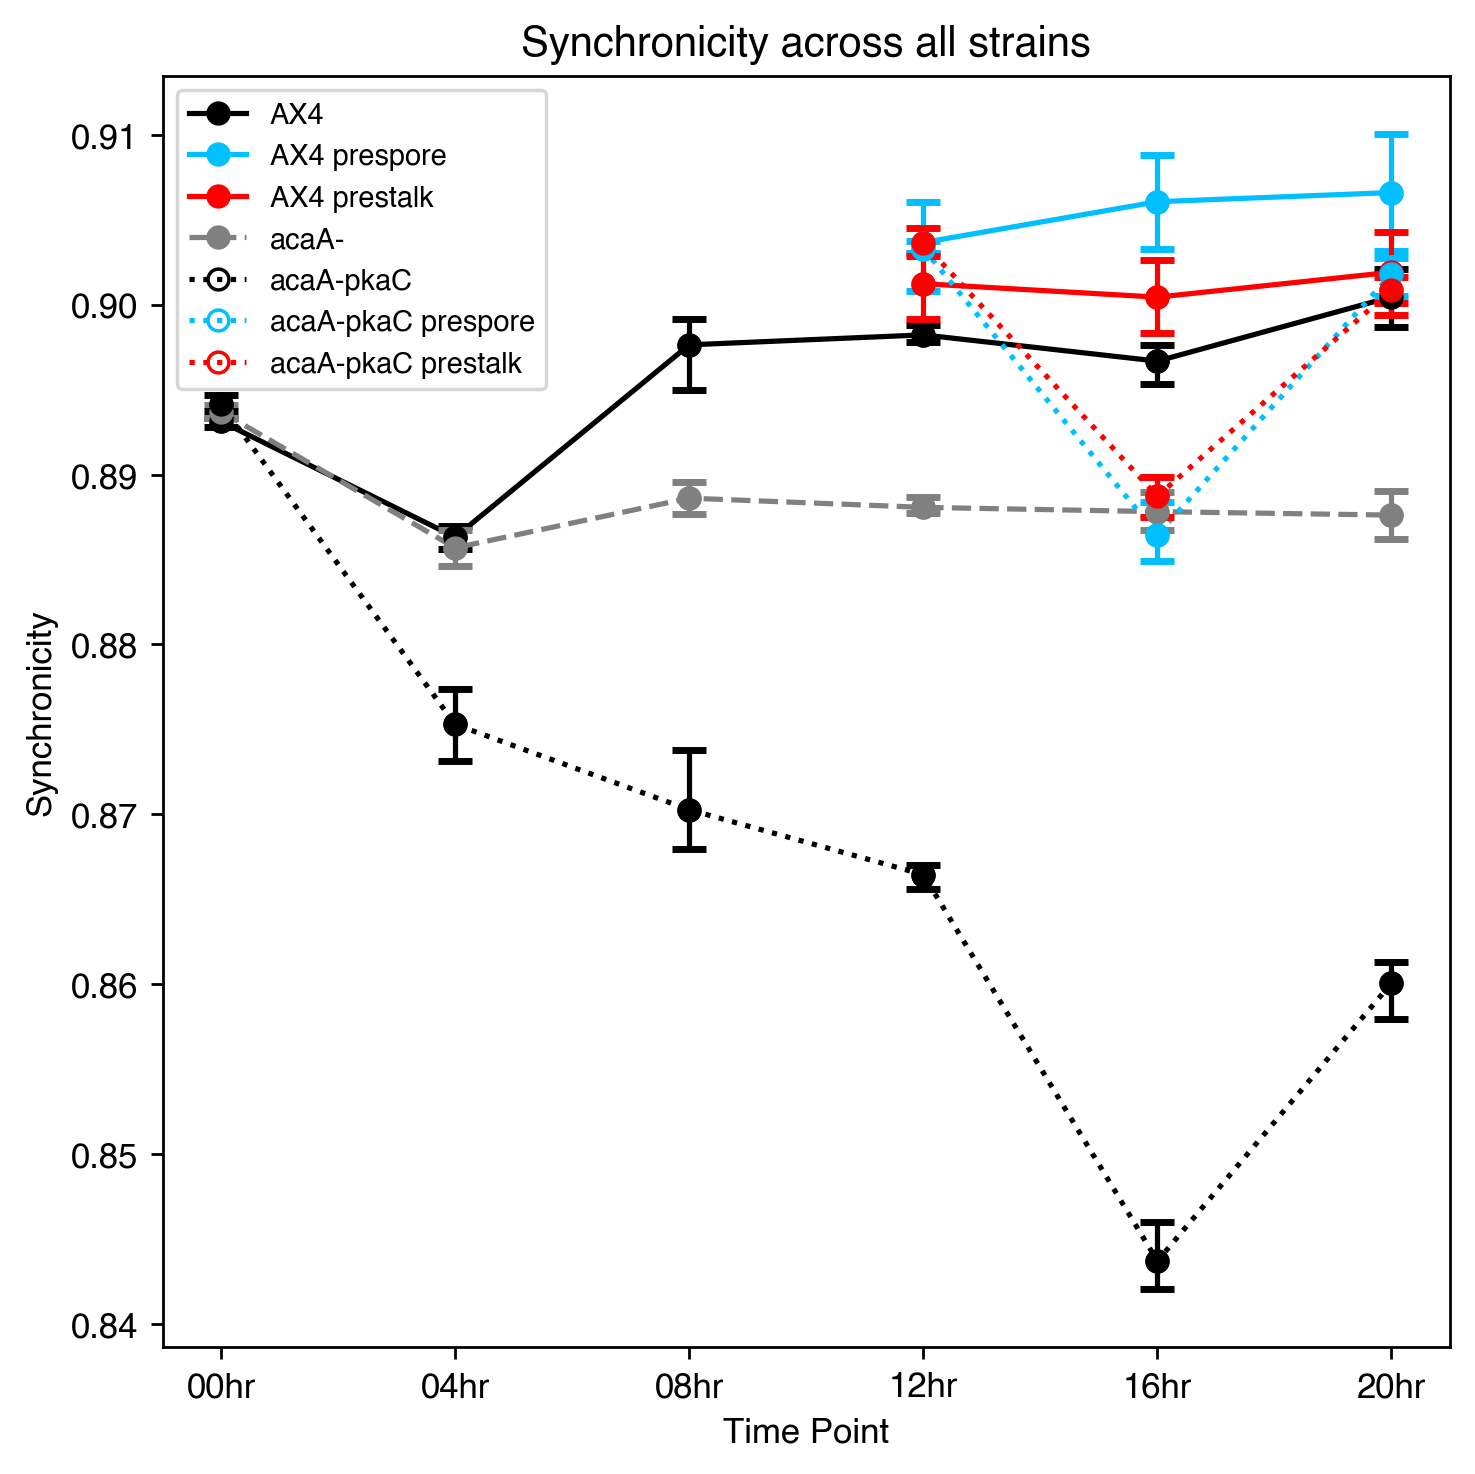

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


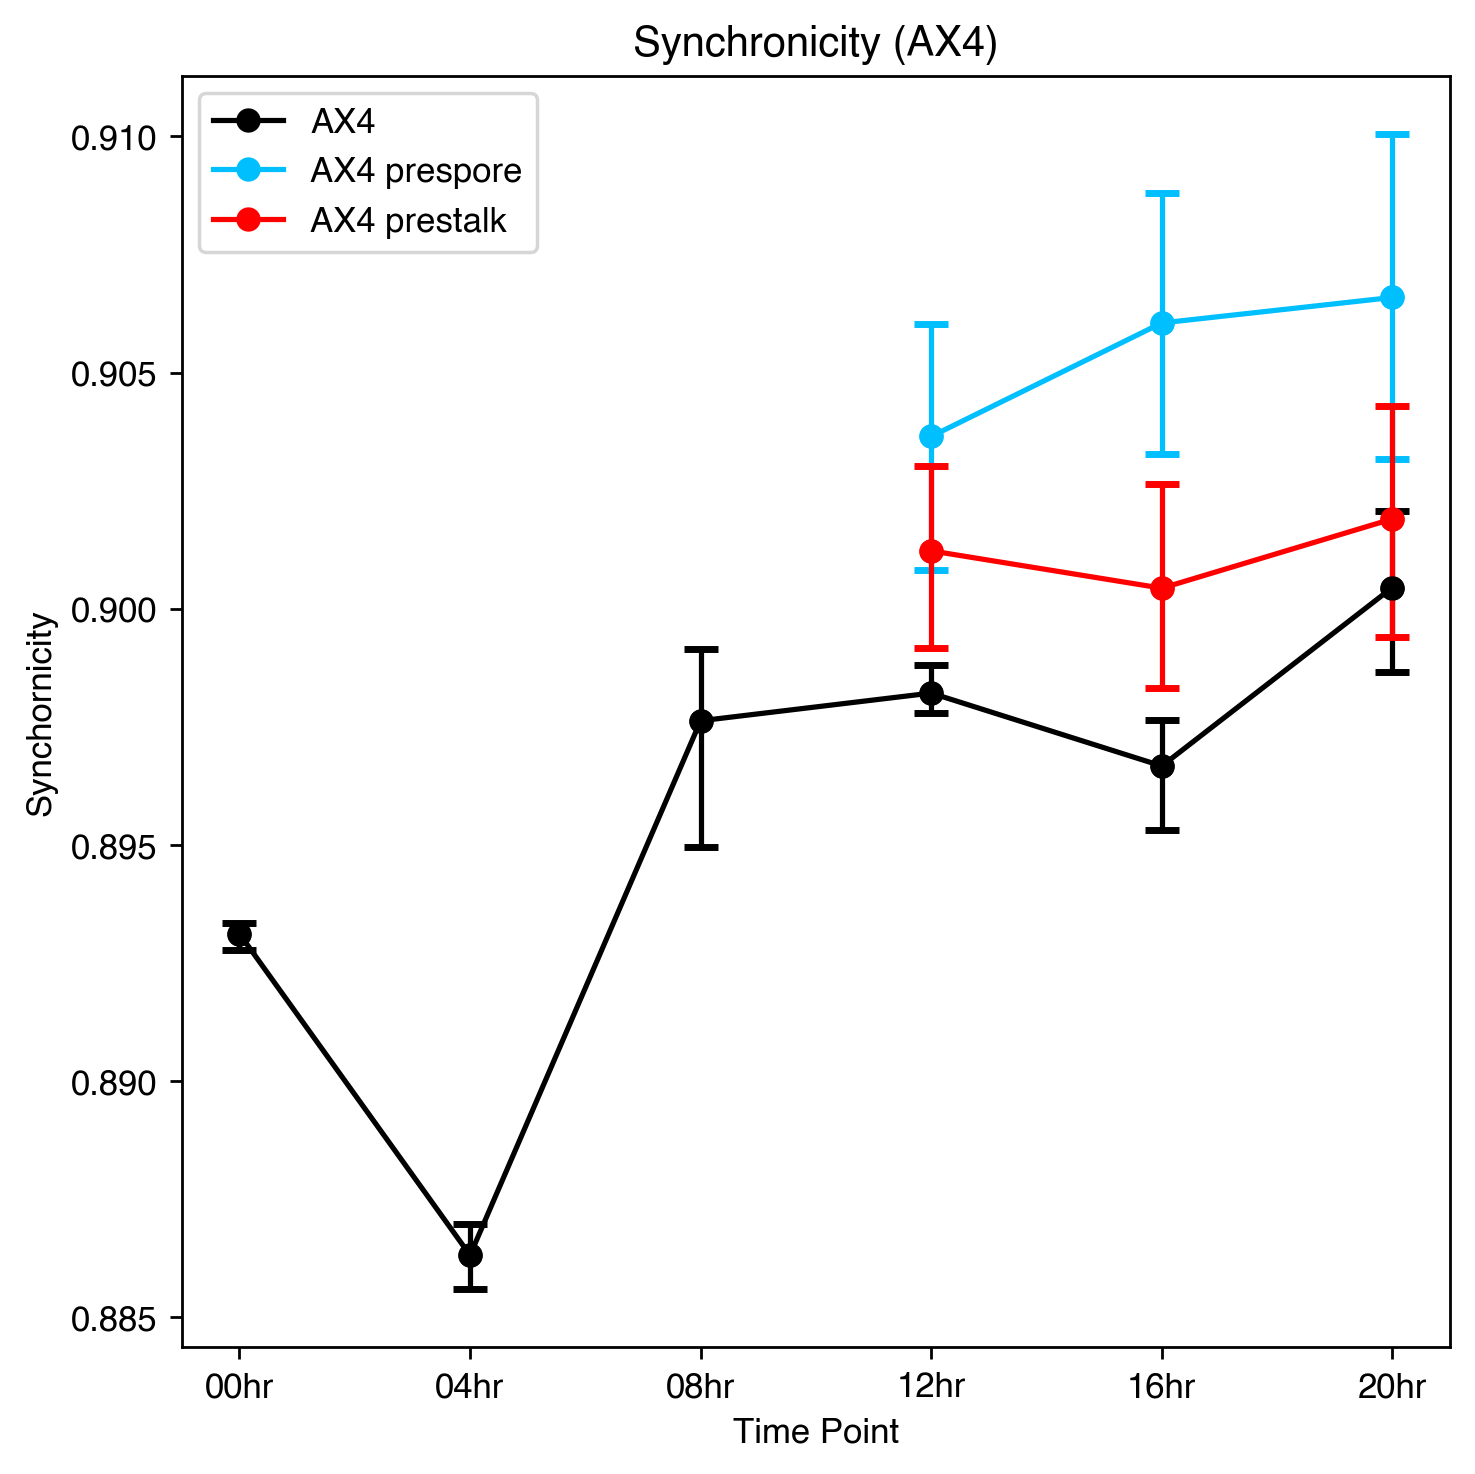

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


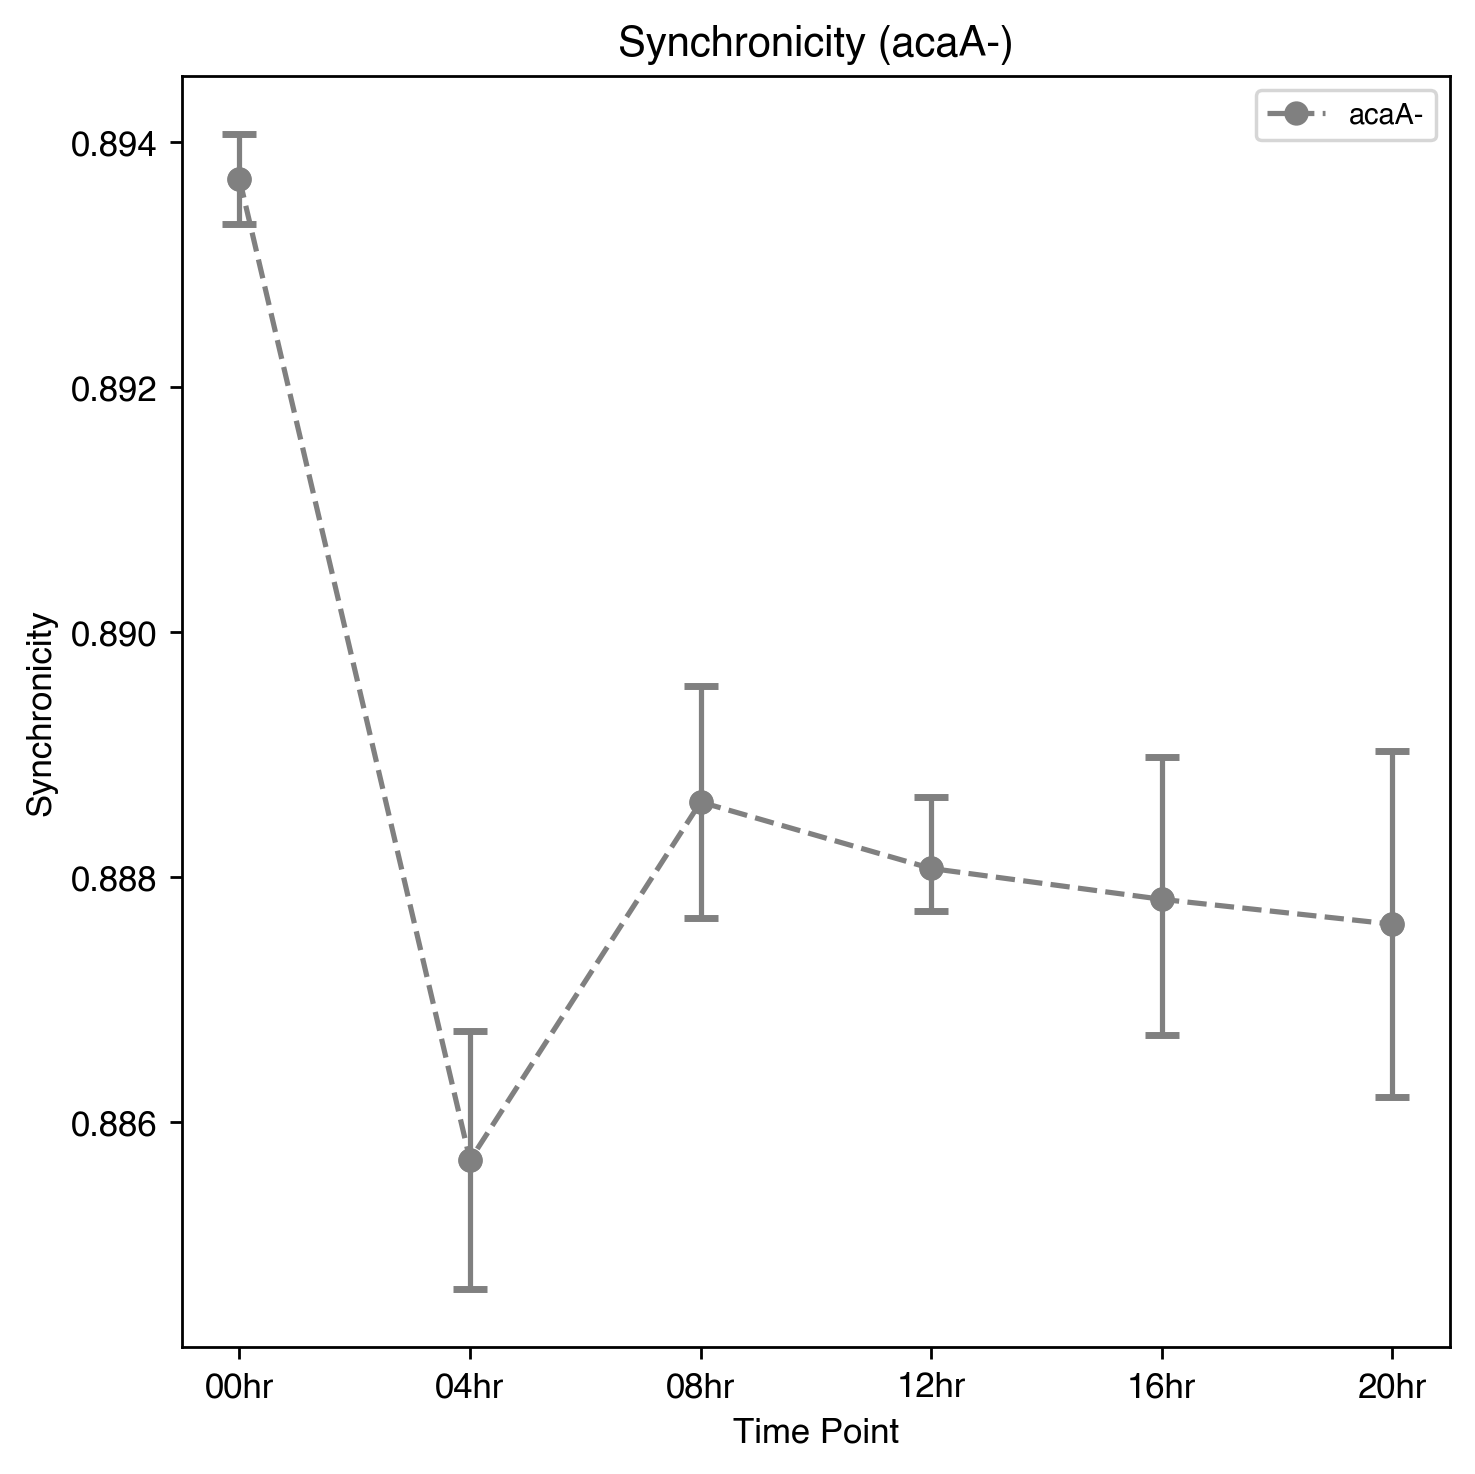

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


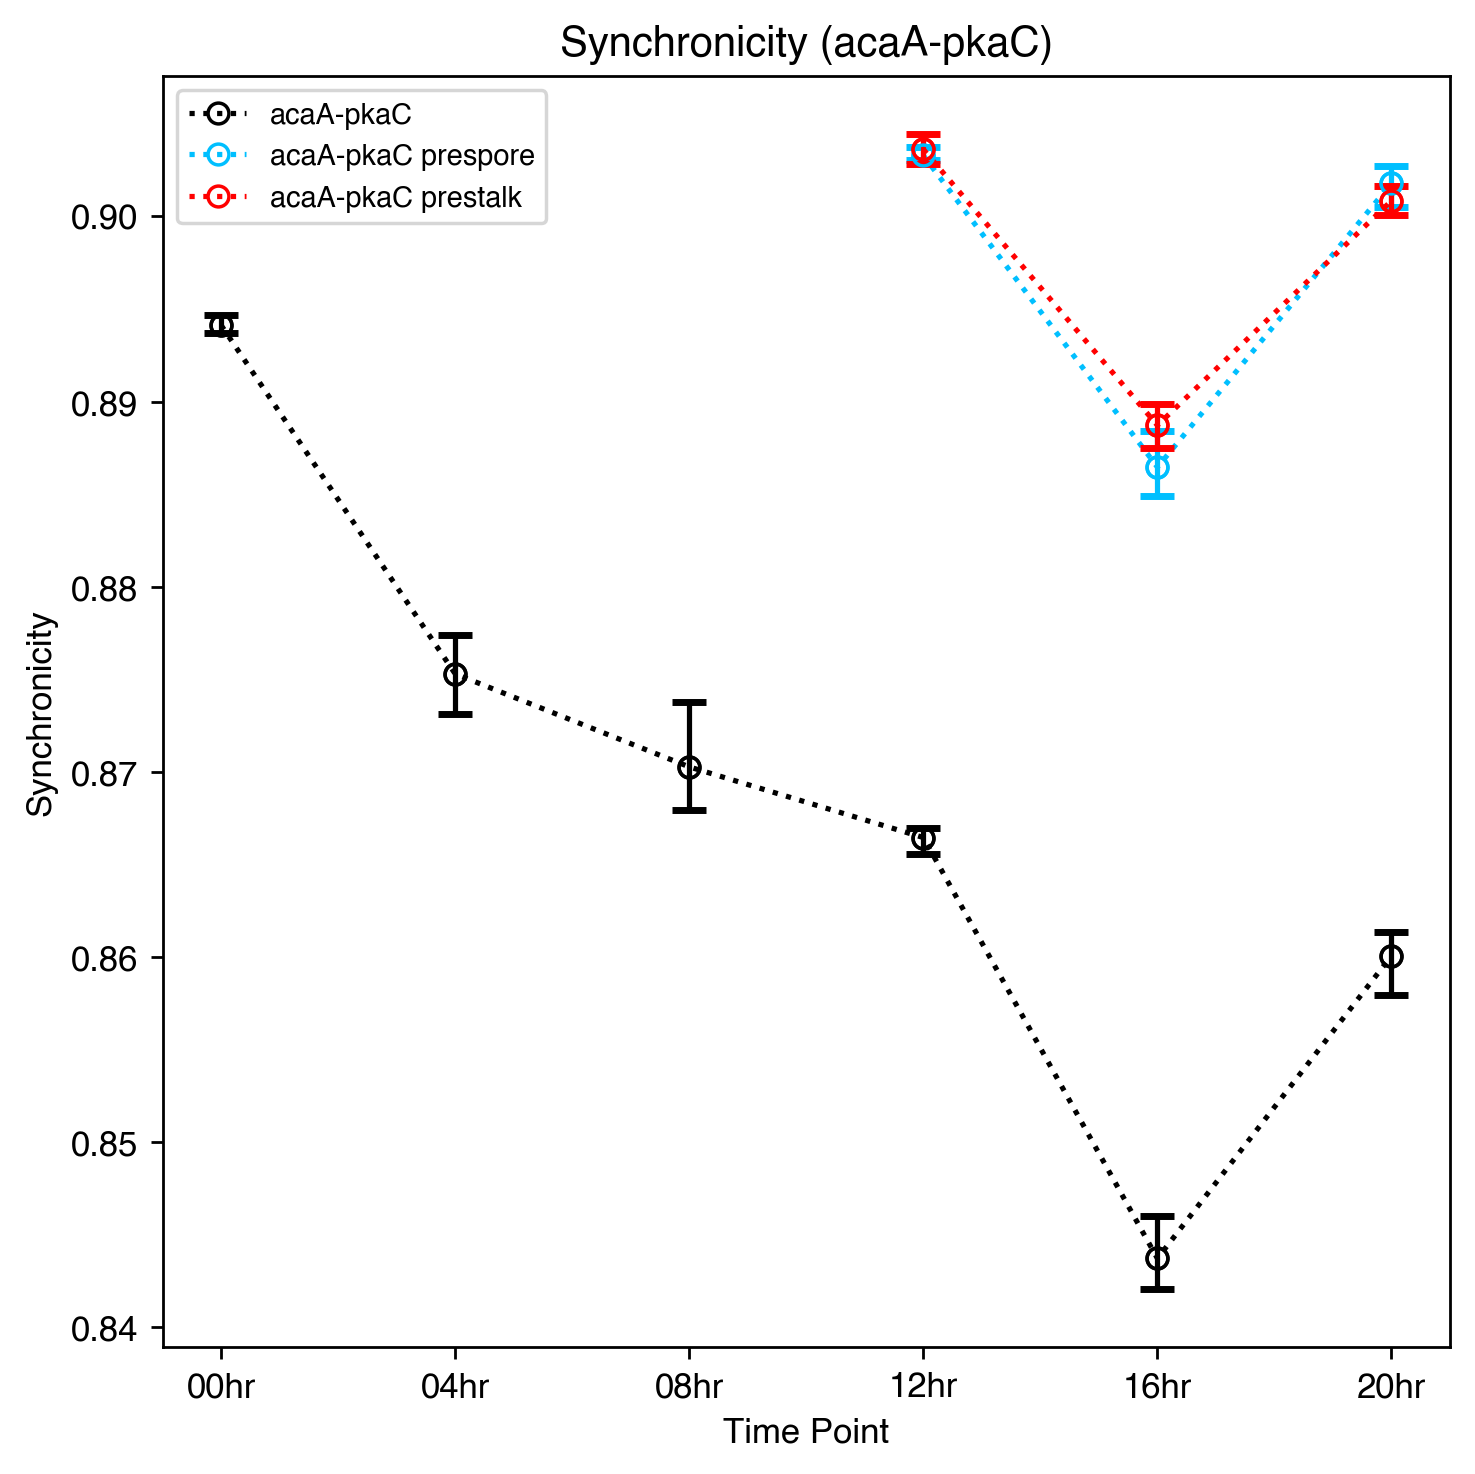

In [21]:

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(
    mean_distances["AX4"]["all"].keys(),
    mean_distances["AX4"]["all"].values(),
    label="AX4",
    color="black",
    marker="o",
)
ax.errorbar(
    mean_distances["AX4"]["all"].keys(),
    [mean_distances["AX4"]["all"][tp] for tp in time_points],
    yerr=[
        [CI_dict["AX4"][tp][0] - CI_dict["AX4"][tp][1] for tp in time_points],
        [CI_dict["AX4"][tp][2] - CI_dict["AX4"][tp][0] for tp in time_points],
    ],
    fmt="o",
    color="black",
    capsize=5,
    capthick=2,
)
ax.plot(
    mean_distances["AX4_psp"]["all"].keys(),
    mean_distances["AX4_psp"]["all"].values(),
    label=f"AX4 prespore",
    color="deepskyblue",
    marker="o",
)
ax.errorbar(
    ["12hr", "16hr", "20hr"],
    [mean_distances["AX4_psp"]["all"][tp] for tp in time_points[3:]],
    yerr=[
        [CI_dict["AX4_psp"][tp][0] - CI_dict["AX4_psp"][tp][1] for tp in time_points[3:]],
        [CI_dict["AX4_psp"][tp][2] - CI_dict["AX4_psp"][tp][0] for tp in time_points[3:]],
    ],
    fmt="o",
    color="deepskyblue",
    capsize=5,
    capthick=2,
)
ax.plot(
    mean_distances["AX4_pst"]["all"].keys(),
    mean_distances["AX4_pst"]["all"].values(),
    label=f"AX4 prestalk",
    color="red",
    marker="o",
)
ax.errorbar(
    ["12hr", "16hr", "20hr"],
    [mean_distances["AX4_pst"]["all"][tp] for tp in time_points[3:]],
    yerr=[
        [CI_dict["AX4_pst"][tp][0] - CI_dict["AX4_pst"][tp][1] for tp in time_points[3:]],
        [CI_dict["AX4_pst"][tp][2] - CI_dict["AX4_pst"][tp][0] for tp in time_points[3:]],
    ],
    fmt="o",
    color="red",
    capsize=5,
    capthick=2,
)
ax.plot(
    mean_distances["acaA"]["all"].keys(),
    mean_distances["acaA"]["all"].values(),
    label="acaA-",
    linestyle="dashed",
    color="grey",
    marker="o",
)
ax.errorbar(
    mean_distances["acaA"]["all"].keys(),
    [mean_distances["acaA"]["all"][tp] for tp in time_points],
    yerr=[
        [CI_dict["acaA"][tp][0] - CI_dict["acaA"][tp][1] for tp in time_points],
        [CI_dict["acaA"][tp][2] - CI_dict["acaA"][tp][0] for tp in time_points],
    ],
    fmt="o",
    color="grey",
    capsize=5,
    capthick=2,
)
ax.plot(
    mean_distances["acaA_pkaC"]["all"].keys(),
    mean_distances["acaA_pkaC"]["all"].values(),
    label="acaA-pkaC",
    color="black",
    marker="o",
    linestyle="dotted",
    markerfacecolor="none",
)
ax.errorbar(
    mean_distances["acaA_pkaC"]["all"].keys(),
    [mean_distances["acaA_pkaC"]["all"][tp] for tp in time_points],
    yerr=[
        [CI_dict["acaA_pkaC"][tp][0] - CI_dict["acaA_pkaC"][tp][1] for tp in time_points],
        [CI_dict["acaA_pkaC"][tp][2] - CI_dict["acaA_pkaC"][tp][0] for tp in time_points],
    ],
    fmt="o",
    color="black",
    capsize=5,
    capthick=2,
)
ax.plot(
    mean_distances["acaA_pkaC_psp"]["all"].keys(),
    mean_distances["acaA_pkaC_psp"]["all"].values(),
    label=f"acaA-pkaC prespore",
    color="deepskyblue",
    linestyle="dotted",
    marker="o",
    markerfacecolor="none",
)
ax.errorbar(
    ["12hr", "16hr", "20hr"],
    [mean_distances["acaA_pkaC_psp"]["all"][tp] for tp in time_points[3:]],
    yerr=[
        [CI_dict["acaA_pkaC_psp"][tp][0] - CI_dict["acaA_pkaC_psp"][tp][1] for tp in time_points[3:]],
        [CI_dict["acaA_pkaC_psp"][tp][2] - CI_dict["acaA_pkaC_psp"][tp][0] for tp in time_points[3:]],
    ],
    fmt="o",
    color="deepskyblue",
    capsize=5,
    capthick=2,
)
ax.plot(
    mean_distances["acaA_pkaC_pst"]["all"].keys(),
    mean_distances["acaA_pkaC_pst"]["all"].values(),
    label=f"acaA-pkaC prestalk",
    color="red",
    linestyle="dotted",
    marker="o",
    markerfacecolor="none",
)
ax.errorbar(
    ["12hr", "16hr", "20hr"],
    [mean_distances["acaA_pkaC_pst"]["all"][tp] for tp in time_points[3:]],
    yerr=[
        [CI_dict["acaA_pkaC_pst"][tp][0] - CI_dict["acaA_pkaC_pst"][tp][1] for tp in time_points[3:]],
        [CI_dict["acaA_pkaC_pst"][tp][2] - CI_dict["acaA_pkaC_pst"][tp][0] for tp in time_points[3:]],
    ],
    fmt="o",
    color="red",
    capsize=5,
    capthick=2,
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Synchronicity")
ax.set_title("Synchronicity across all strains")
plt.legend(fontsize="small")
plt.tight_layout()
plt.savefig(f"../results/figures/synchronicity/all_error.png", dpi=300)
plt.savefig(f"../results/figures/synchronicity/all_error.pdf", dpi=300)
plt.show()

# Redirect standard output to a file
original_stdout = sys.stdout  # Save the original standard output
with open("../results/other/prespore_prestalk_numbers.txt", "w") as file:
    sys.stdout = file
    
    print("AX4:")

    print(
        "Number of prespore cells at 12hr, 16hr, 20hr: ", cell_counts["AX4_psp"]["all"]
    )
    print(
        "Number of prestalk cells at 12hr, 16hr, 20hr: ", cell_counts["AX4_pst"]["all"]
    )
    print(
        f"Percentages from prespore and prestalk: "
        f"{cell_counts['AX4_psp']['all']['12hr'] / (cell_counts['AX4_psp']['all']['12hr'] + cell_counts['AX4_pst']['all']['12hr']) * 100:.2f}%, "
        f"{cell_counts['AX4_psp']['all']['16hr'] / (cell_counts['AX4_psp']['all']['16hr'] + cell_counts['AX4_pst']['all']['16hr']) * 100:.2f}%, "
        f"{cell_counts['AX4_psp']['all']['20hr'] / (cell_counts['AX4_psp']['all']['20hr'] + cell_counts['AX4_pst']['all']['20hr']) * 100:.2f}%"
    )

    sys.stdout = original_stdout


fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(
    mean_distances["AX4"]["all"].keys(),
    mean_distances["AX4"]["all"].values(),
    label="AX4",
    color="black",
    marker="o",
)
ax.errorbar(
    mean_distances["AX4"]["all"].keys(),
    [mean_distances["AX4"]["all"][tp] for tp in time_points],
    yerr=[
        [CI_dict["AX4"][tp][0] - CI_dict["AX4"][tp][1] for tp in time_points],
        [CI_dict["AX4"][tp][2] - CI_dict["AX4"][tp][0] for tp in time_points],
    ],
    fmt="o",
    color="black",
    capsize=5,
    capthick=2,
)
ax.plot(
    mean_distances["AX4_psp"]["all"].keys(),
    mean_distances["AX4_psp"]["all"].values(),
    label=f"AX4 prespore",
    color="deepskyblue",
    marker="o",
)
ax.errorbar(
    ["12hr", "16hr", "20hr"],
    [mean_distances["AX4_psp"]["all"][tp] for tp in time_points[3:]],
    yerr=[
        [CI_dict["AX4_psp"][tp][0] - CI_dict["AX4_psp"][tp][1] for tp in time_points[3:]],
        [CI_dict["AX4_psp"][tp][2] - CI_dict["AX4_psp"][tp][0] for tp in time_points[3:]],
    ],
    fmt="o",
    color="deepskyblue",
    capsize=5,
    capthick=2,
)
ax.plot(
    mean_distances["AX4_pst"]["all"].keys(),
    mean_distances["AX4_pst"]["all"].values(),
    label=f"AX4 prestalk",
    color="red",
    marker="o",
)
ax.errorbar(
    ["12hr", "16hr", "20hr"],
    [mean_distances["AX4_pst"]["all"][tp] for tp in time_points[3:]],
    yerr=[
        [CI_dict["AX4_pst"][tp][0] - CI_dict["AX4_pst"][tp][1] for tp in time_points[3:]],
        [CI_dict["AX4_pst"][tp][2] - CI_dict["AX4_pst"][tp][0] for tp in time_points[3:]],
    ],
    fmt="o",
    color="red",
    capsize=5,
    capthick=2,
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Synchornicity")
ax.set_title("Synchronicity (AX4)")
plt.legend()
plt.tight_layout()
plt.savefig(f"../results/figures/synchronicity/AX4_error.png", dpi=300)
plt.savefig(f"../results/figures/synchronicity/AX4_error.pdf", dpi=300)
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(
    mean_distances["acaA"]["all"].keys(),
    mean_distances["acaA"]["all"].values(),
    label="acaA-",
    color="grey",
    linestyle="dashed",
    marker="o",
)
ax.errorbar(
    mean_distances["acaA"]["all"].keys(),
    [mean_distances["acaA"]["all"][tp] for tp in time_points],
    yerr=[
        [CI_dict["acaA"][tp][0] - CI_dict["acaA"][tp][1] for tp in time_points],
        [CI_dict["acaA"][tp][2] - CI_dict["acaA"][tp][0] for tp in time_points],
    ],
    fmt="o",
    color="grey",
    capsize=5,
    capthick=2,
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Synchronicity")
ax.set_title("Synchronicity (acaA-)")

plt.legend(fontsize="small")
plt.tight_layout()
plt.savefig(f"../results/figures/synchronicity/acaA_error.png", dpi=300)
plt.savefig(f"../results/figures/synchronicity/acaA_error.pdf", dpi=300)
plt.show()



fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(
    mean_distances["acaA_pkaC"]["all"].keys(),
    mean_distances["acaA_pkaC"]["all"].values(),
    label="acaA-pkaC",
    color="black",
    marker="o",
    linestyle="dotted",
    markerfacecolor="none",
)
ax.errorbar(
    mean_distances["acaA_pkaC"]["all"].keys(),
    [mean_distances["acaA_pkaC"]["all"][tp] for tp in time_points],
    yerr=[
        [
            CI_dict["acaA_pkaC"][tp][0] - CI_dict["acaA_pkaC"][tp][1]
            for tp in time_points
        ],
        [
            CI_dict["acaA_pkaC"][tp][2] - CI_dict["acaA_pkaC"][tp][0]
            for tp in time_points
        ],
    ],
    fmt="o",
    color="black",
    markerfacecolor="none",
    capsize=5,
    capthick=2,
)
ax.plot(
    mean_distances["acaA_pkaC_psp"]["all"].keys(),
    mean_distances["acaA_pkaC_psp"]["all"].values(),
    label=f"acaA-pkaC prespore",
    color="deepskyblue",
    marker="o",
    linestyle="dotted",
    markerfacecolor="none",
)
ax.errorbar(
    ["12hr", "16hr", "20hr"],
    [mean_distances["acaA_pkaC_psp"]["all"][tp] for tp in time_points[3:]],
    yerr=[
        [
            CI_dict["acaA_pkaC_psp"][tp][0] - CI_dict["acaA_pkaC_psp"][tp][1]
            for tp in time_points[3:]
        ],
        [
            CI_dict["acaA_pkaC_psp"][tp][2] - CI_dict["acaA_pkaC_psp"][tp][0]
            for tp in time_points[3:]
        ],
    ],
    fmt="o",
    color="deepskyblue",
    capsize=5,
    capthick=2,
    markerfacecolor="none",
)
ax.plot(
    mean_distances["acaA_pkaC_pst"]["all"].keys(),
    mean_distances["acaA_pkaC_pst"]["all"].values(),
    label=f"acaA-pkaC prestalk",
    color="red",
    marker="o",
    linestyle="dotted",
    markerfacecolor="none",
)
ax.errorbar(
    ["12hr", "16hr", "20hr"],
    [mean_distances["acaA_pkaC_pst"]["all"][tp] for tp in time_points[3:]],
    yerr=[
        [
            CI_dict["acaA_pkaC_pst"][tp][0] - CI_dict["acaA_pkaC_pst"][tp][1]
            for tp in time_points[3:]
        ],
        [
            CI_dict["acaA_pkaC_pst"][tp][2] - CI_dict["acaA_pkaC_pst"][tp][0]
            for tp in time_points[3:]
        ],
    ],
    fmt="o",
    color="red",
    capsize=5,
    capthick=2,
    markerfacecolor="none",
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Synchronicity")
ax.set_title("Synchronicity (acaA-pkaC)")

plt.legend(fontsize="small")
plt.tight_layout()
plt.savefig(f"../results/figures/synchronicity/acaA_pkaC_error.png", dpi=300)
plt.savefig(f"../results/figures/synchronicity/acaA_pkaC_error.pdf", dpi=300)
plt.show()

# Redirect standard output to a file
original_stdout = sys.stdout  # Save the original standard output
with open("../results/other/prespore_prestalk_numbers_acaA_pkaC.txt", "w") as file:
    sys.stdout = file
    
    print("acaA-pkaC:")

    print(
        "Number of prespore cells at 12hr, 16hr, 20hr: ", cell_counts["acaA_pkaC_psp"]["all"]
    )
    print(
        "Number of prestalk cells at 12hr, 16hr, 20hr: ", cell_counts["acaA_pkaC_pst"]["all"]
    )
    print(
        f"Percentages from prespore and prestalk: "
        f"{cell_counts['acaA_pkaC_psp']['all']['12hr'] / (cell_counts['acaA_pkaC_psp']['all']['12hr'] + cell_counts['acaA_pkaC_pst']['all']['12hr']) * 100:.2f}%, "
        f"{cell_counts['acaA_pkaC_psp']['all']['16hr'] / (cell_counts['acaA_pkaC_psp']['all']['16hr'] + cell_counts['acaA_pkaC_pst']['all']['16hr']) * 100:.2f}%, "
        f"{cell_counts['acaA_pkaC_psp']['all']['20hr'] / (cell_counts['acaA_pkaC_psp']['all']['20hr'] + cell_counts['acaA_pkaC_pst']['all']['20hr']) * 100:.2f}%"
    )

    sys.stdout = original_stdout

In [29]:
mean_distances_pca = {
    "AX4": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
        "mNeonG": {},
    },
    "AX4_psp": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
        "mNeonG": {},
    },
    "AX4_pst": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
        "mNeonG": {},
    },
    "acaA": {"all": {}, "act15GFP": {}, "mCherry": {}, "mCerulean": {}, "mNeonG": {}},
    "acaA_pkaC": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_psp": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_pst": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
}

cell_counts_pca = {
    "AX4": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
        "mNeonG": {},
    },
    "AX4_psp": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
        "mNeonG": {},
    },
    "AX4_pst": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
        "mNeonG": {},
    },
    "acaA": {"all": {}, "act15GFP": {}, "mCherry": {}, "mCerulean": {}, "mNeonG": {}},
    "acaA_pkaC": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_psp": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_pst": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    
}

median_genes_pca = {
    "AX4": {
        "all": {},
        "psp": {},
        "pst": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
        "mNeonG": {},
    },
    "AX4_psp": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
        "mNeonG": {},
    },
    "AX4_pst": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
        "mNeonG": {},
    },
    "acaA": {"all": {}, "act15GFP": {}, "mCherry": {}, "mCerulean": {}, "mNeonG": {}},
    "acaA_pkaC": {
        "all": {},
        "psp": {},
        "pst": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_psp": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_pst": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
}

total_reads_pca = {
    "AX4": {
        "all": {},
        "psp": {},
        "pst": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
        "mNeonG": {},
    },
    "AX4_psp": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
        "mNeonG": {},
    },
    "AX4_pst": {
        "all": {},
        "act15GFP": {},
        "mCherry": {},
        "mCerulean": {},
        "mNeonG": {},
    },
    "acaA": {"all": {}, "act15GFP": {}, "mCherry": {}, "mCerulean": {}, "mNeonG": {}},
    "acaA_pkaC": {
        "all": {},
        "psp": {},
        "pst": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_psp": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
    "acaA_pkaC_pst": {
        "all": {},
        "r1": {},
        "r2": {},
        "r3": {},
    },
}


for tp in time_points:
    adata = adatas[tp]
    adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)
    adata.obs["total_reads"] = adata.X.sum(axis=1)

    # Mean cosine distance for all cells
    cell_vectors = adata.obsm["X_pca"]
    mean_vector = np.mean(cell_vectors, axis=0)
    mean_distances_pca["AX4"]["all"][tp] = 1 / (
        1
        + np.mean(
            np.linalg.norm(
                adata.obsm["X_pca"] - np.mean(adata.obsm["X_pca"], axis=0), axis=1
            )
        )
    )
    cell_counts_pca["AX4"]["all"][tp] = len(cell_vectors)
    median_genes_pca["AX4"]["all"][tp] = np.median(adata.obs["n_genes"])
    total_reads_pca["AX4"]["all"][tp] = np.sum(adata.obs["total_reads"])

    # Specific subsets (e.g., prespore/prestalk, markers)
    if tp in ["12hr", "16hr", "20hr"]:
        for cell_type in ["psp", "pst"]:
            subset = adata[adata.obs["cell_type"].str.contains(cell_type, na=False)]
            cell_vectors = subset.obsm["X_pca"]
            if len(cell_vectors) > 0:
                mean_distances_pca[f"AX4_{cell_type}"]["all"][tp] = 1 / (
                    1
                    + np.mean(
                        np.linalg.norm(
                            cell_vectors - np.mean(cell_vectors, axis=0), axis=1
                        )
                    )
                )
                cell_counts_pca[f"AX4_{cell_type}"]["all"][tp] = len(subset)
                median_genes_pca[f"AX4_{cell_type}"]["all"][tp] = np.median(
                    subset.obs["n_genes"]
                )
                total_reads_pca[f"AX4_{cell_type}"]["all"][tp] = np.sum(
                    subset.obs["total_reads"]
                )
                for marker in ["act15GFP", "mCherry", "mCerulean", "mNeonG"]:
                    subset2 = subset[subset.obs["marker"] == marker]
                    cell_vectors = subset2.obsm["X_pca"]
                    if len(cell_vectors) > 0:
                        mean_distances_pca[f"AX4_{cell_type}"][marker][tp] = 1 / (
                            1
                            + np.mean(
                                np.linalg.norm(
                                    cell_vectors - np.mean(cell_vectors, axis=0), axis=1
                                )
                            )
                        )
                    cell_counts_pca[f"AX4_{cell_type}"][marker][tp] = len(subset2)
                    median_genes_pca[f"AX4_{cell_type}"][marker][tp] = np.median(subset2.obs["n_genes"])
                    total_reads_pca[f"AX4_{cell_type}"][marker][tp] = np.sum(subset2.obs["total_reads"])


    for marker in ["act15GFP", "mCherry", "mCerulean", "mNeonG"]:
        subset = adata[adata.obs["marker"] == marker]
        cell_vectors = subset.obsm["X_pca"]
        if len(cell_vectors) > 0:
            mean_distances_pca["AX4"][marker][tp] = 1 / (
                1
                + np.mean(
                    np.linalg.norm(
                        cell_vectors - np.mean(cell_vectors, axis=0), axis=1
                    )
                )
            )
        cell_counts_pca["AX4"][marker][tp] = len(subset)
        median_genes_pca["AX4"][marker][tp] = np.median(subset.obs["n_genes"])
        total_reads_pca["AX4"][marker][tp] = np.sum(subset.obs["total_reads"])

# acaA-specific calculations
for tp in time_points:
    adata = adatas_acaA[tp]
    adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)
    adata.obs["total_reads"] = adata.X.sum(axis=1)
    mean_vector = np.mean(adata.obsm["X_pca"], axis=0)
    mean_distances_pca["acaA"]["all"][tp] = 1 / (
        1
        + np.mean(
            np.linalg.norm(
                adata.obsm["X_pca"] - np.mean(adata.obsm["X_pca"], axis=0), axis=1
            )
        )
    )
    cell_counts_pca["acaA"]["all"][tp] = len(adata)
    median_genes_pca["acaA"]["all"][tp] = np.median(adata.obs["n_genes"])
    total_reads_pca["acaA"]["all"][tp] = np.sum(adata.obs["total_reads"])
    for marker in ["act15GFP", "mCherry", "mCerulean", "mNeonG"]:
        subset = adata[adata.obs["marker"] == marker]
        cell_vectors = subset.obsm["X_pca"]
        if len(cell_vectors) > 0:
            mean_distances_pca["acaA"][marker][tp] = 1 / (
                1
                + np.mean(
                    np.linalg.norm(
                        cell_vectors - np.mean(cell_vectors, axis=0), axis=1
                    )
                )
            )
        cell_counts_pca["acaA"][marker][tp] = len(subset)
        median_genes_pca["acaA"][marker][tp] = np.median(subset.obs["n_genes"])
        total_reads_pca["acaA"][marker][tp] = np.sum(subset.obs["total_reads"])
        
for tp in time_points:
    adata = adatas_acaA_pkaC[tp]
    adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)
    adata.obs["total_reads"] = adata.X.sum(axis=1)
    mean_vector = np.mean(adata.obsm["X_pca"], axis=0)
    mean_distances_pca["acaA_pkaC"]["all"][tp] = 1 / (
        1
        + np.mean(
            np.linalg.norm(
                adata.obsm["X_pca"] - np.mean(adata.obsm["X_pca"], axis=0), axis=1
            )
        )
    )
    cell_counts_pca["acaA_pkaC"]["all"][tp] = len(adata)
    median_genes_pca["acaA_pkaC"]["all"][tp] = np.median(adata.obs["n_genes"])
    total_reads_pca["acaA_pkaC"]["all"][tp] = np.sum(adata.obs["total_reads"])
    if tp in ["12hr", "16hr", "20hr"]:
        for cell_type in ["psp", "pst"]:
                subset = adata[adata.obs["cell_type"].str.contains(cell_type, na=False)]
                cell_vectors = subset.obsm["X_pca"]
                if len(cell_vectors) > 0:
                    mean_distances_pca[f"acaA_pkaC_{cell_type}"]["all"][tp] = 1 / (
                        1
                        + np.mean(
                            np.linalg.norm(
                                cell_vectors - np.mean(cell_vectors, axis=0), axis=1
                            )
                        )
                    )
                    cell_counts_pca[f"acaA_pkaC_{cell_type}"]["all"][tp] = len(subset)
                    median_genes_pca[f"acaA_pkaC_{cell_type}"]["all"][tp] = np.median(
                        subset.obs["n_genes"]
                    )
                    total_reads_pca[f"acaA_pkaC_{cell_type}"]["all"][tp] = np.sum(
                        subset.obs["total_reads"]
                    )
                    for marker in ["r1", "r2", "r3"]:
                        subset2 = subset[subset.obs["marker"] == marker]
                        cell_vectors = subset2.obsm["X_pca"]
                        if len(cell_vectors) > 0:
                            mean_distances_pca[f"acaA_pkaC_{cell_type}"][marker][tp] = 1 / (
                                1
                                + np.mean(
                                    np.linalg.norm(
                                        cell_vectors - np.mean(cell_vectors, axis=0), axis=1
                                    )
                                )
                            )
                        cell_counts_pca[f"acaA_pkaC_{cell_type}"][marker][tp] = len(subset2)
                        median_genes_pca[f"acaA_pkaC_{cell_type}"][marker][tp] = np.median(subset2.obs["n_genes"])
                        total_reads_pca[f"acaA_pkaC_{cell_type}"][marker][tp] = np.sum(subset2.obs["total_reads"])
                    
    for marker in ["r1", "r2", "r3"]:
        subset = adata[adata.obs["marker"] == marker]
        cell_vectors = subset.obsm["X_pca"]
        if len(cell_vectors) > 0:
            mean_distances_pca["acaA_pkaC"][marker][tp] = 1 / (
                1
                + np.mean(
                    np.linalg.norm(
                        cell_vectors - np.mean(cell_vectors, axis=0), axis=1
                    )
                )
            )
        cell_counts_pca["acaA_pkaC"][marker][tp] = len(subset)
        median_genes_pca["acaA_pkaC"][marker][tp] = np.median(subset.obs["n_genes"])
        total_reads_pca["acaA_pkaC"][marker][tp] = np.sum(subset.obs["total_reads"])

/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/1916828294.py:185: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)
/opt/anaconda3/envs/scRNA_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/scRNA_env/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/1916828294.py:185: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)
/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_30639/1916828294.py:185: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializi

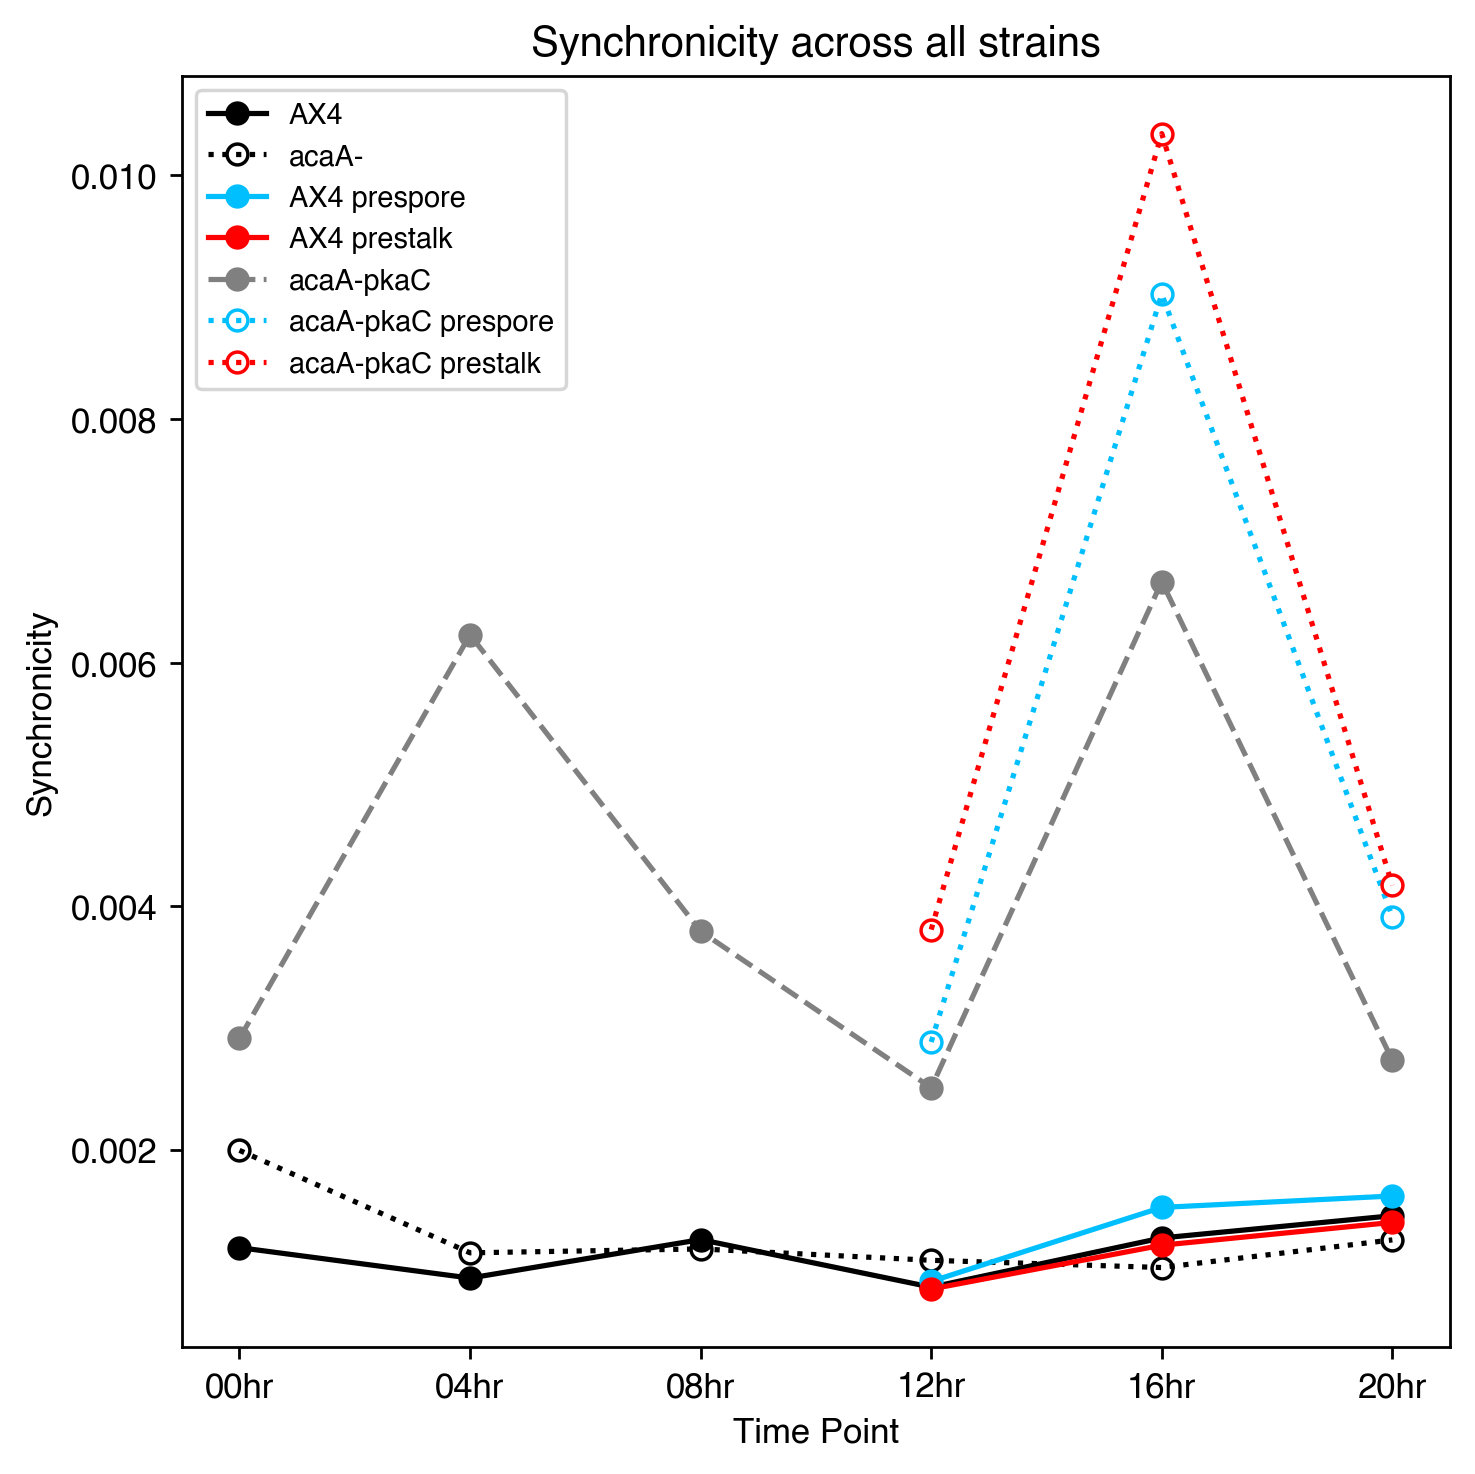

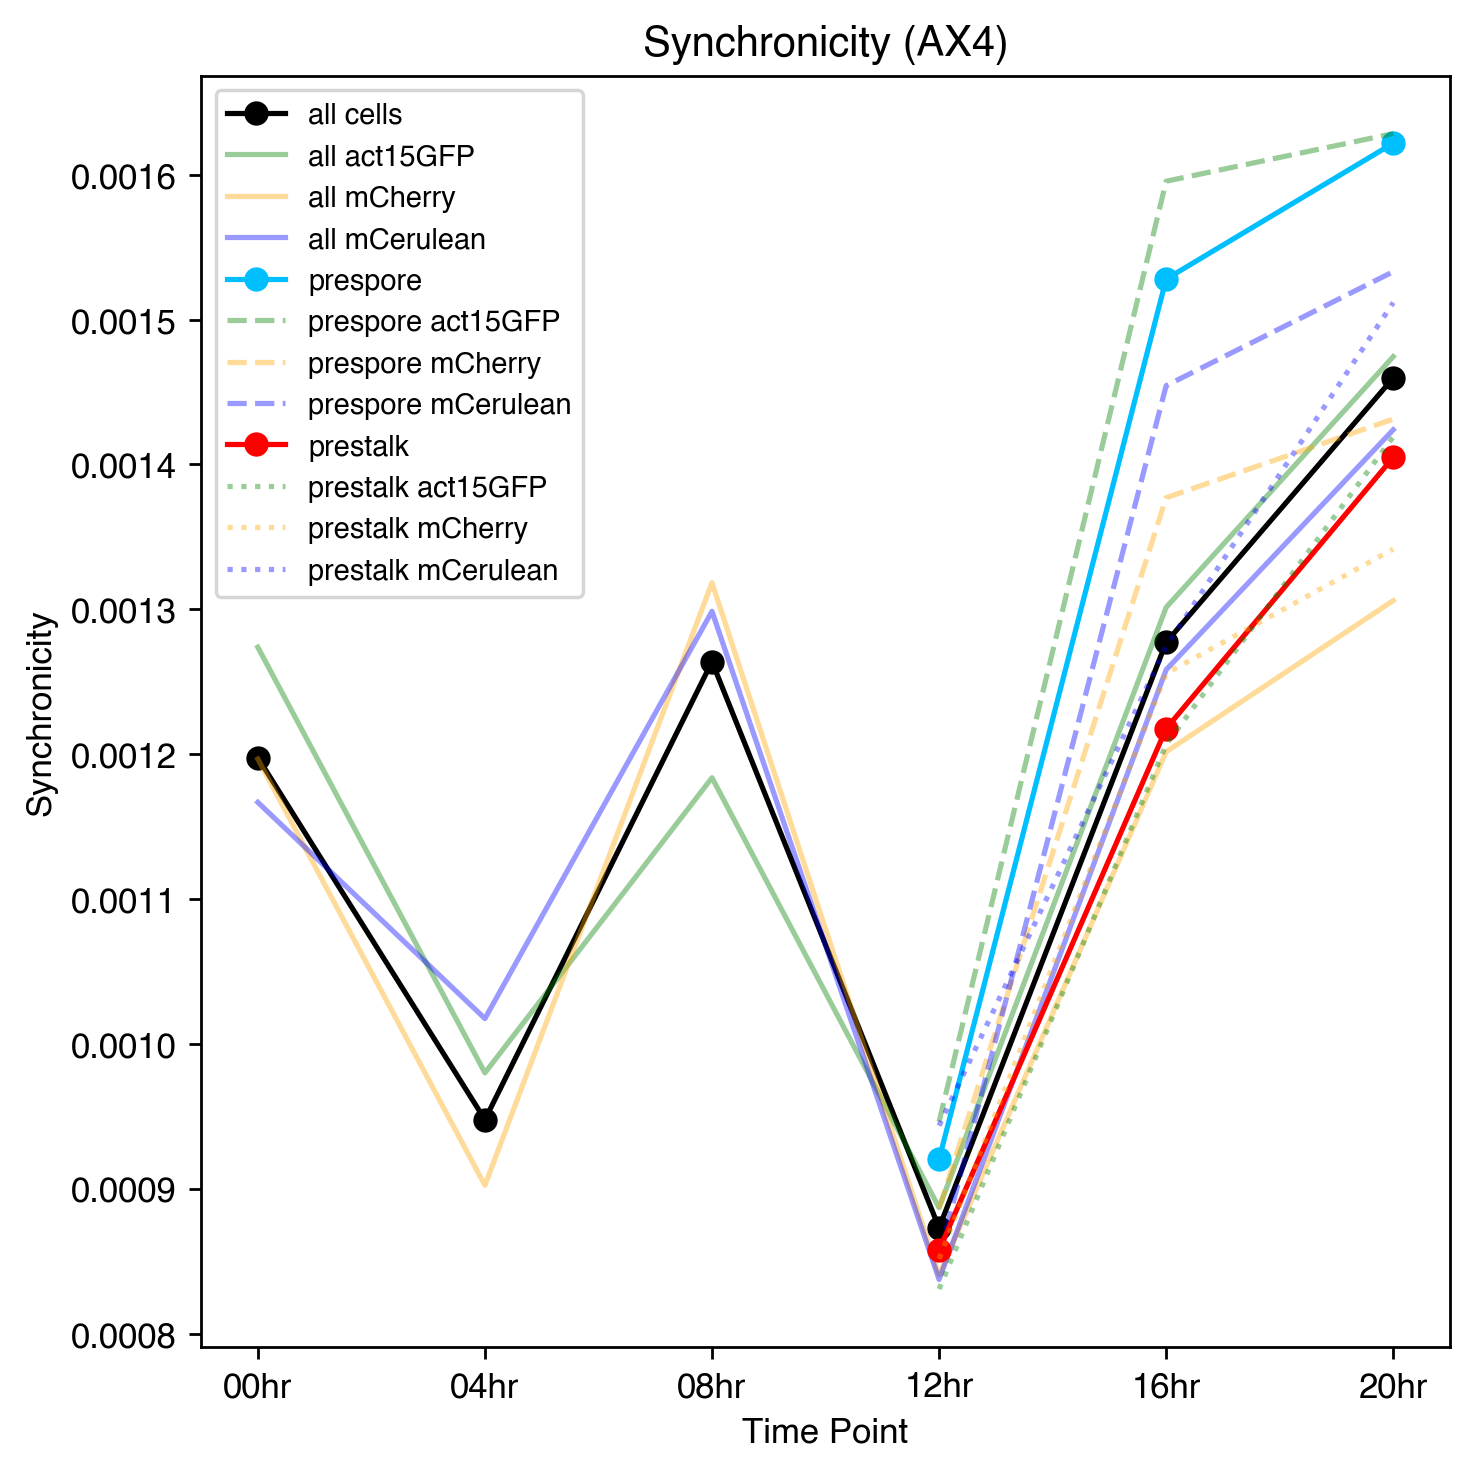

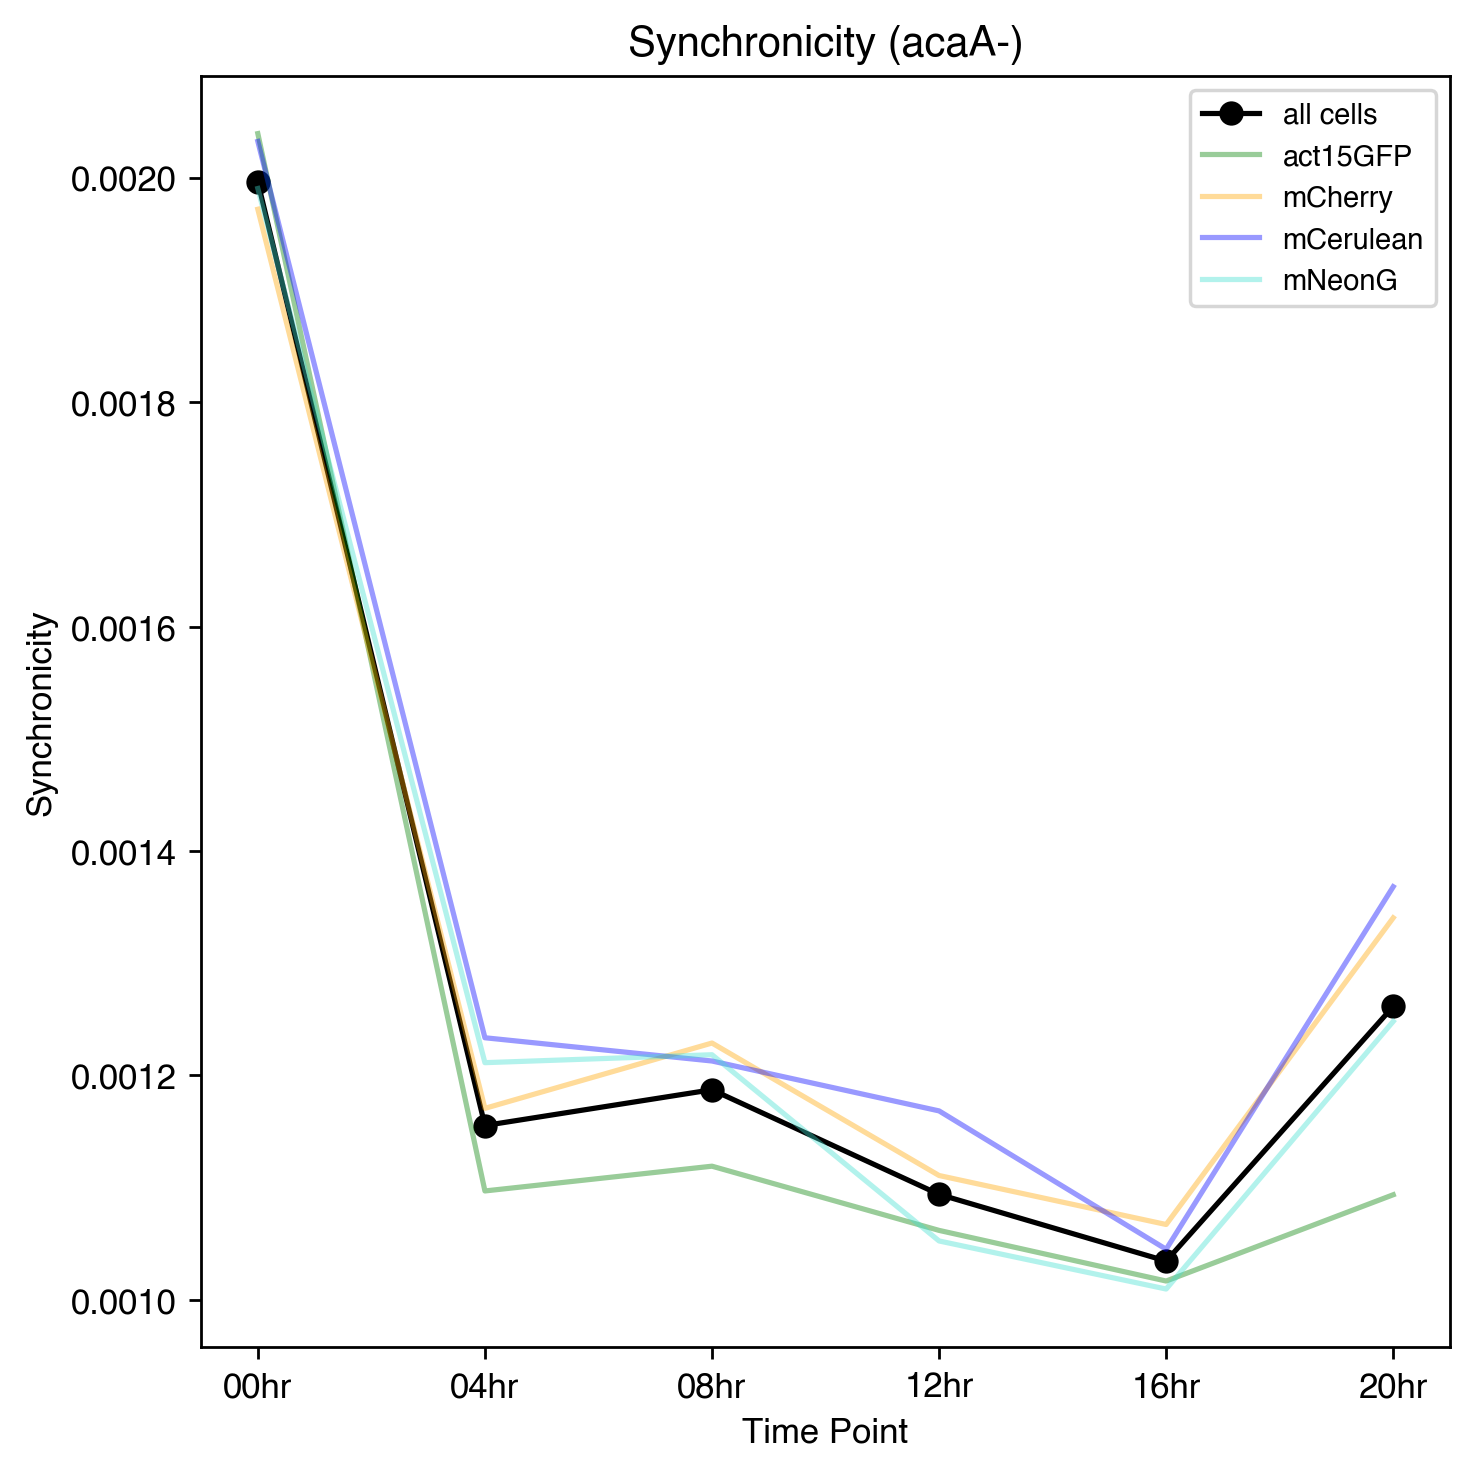

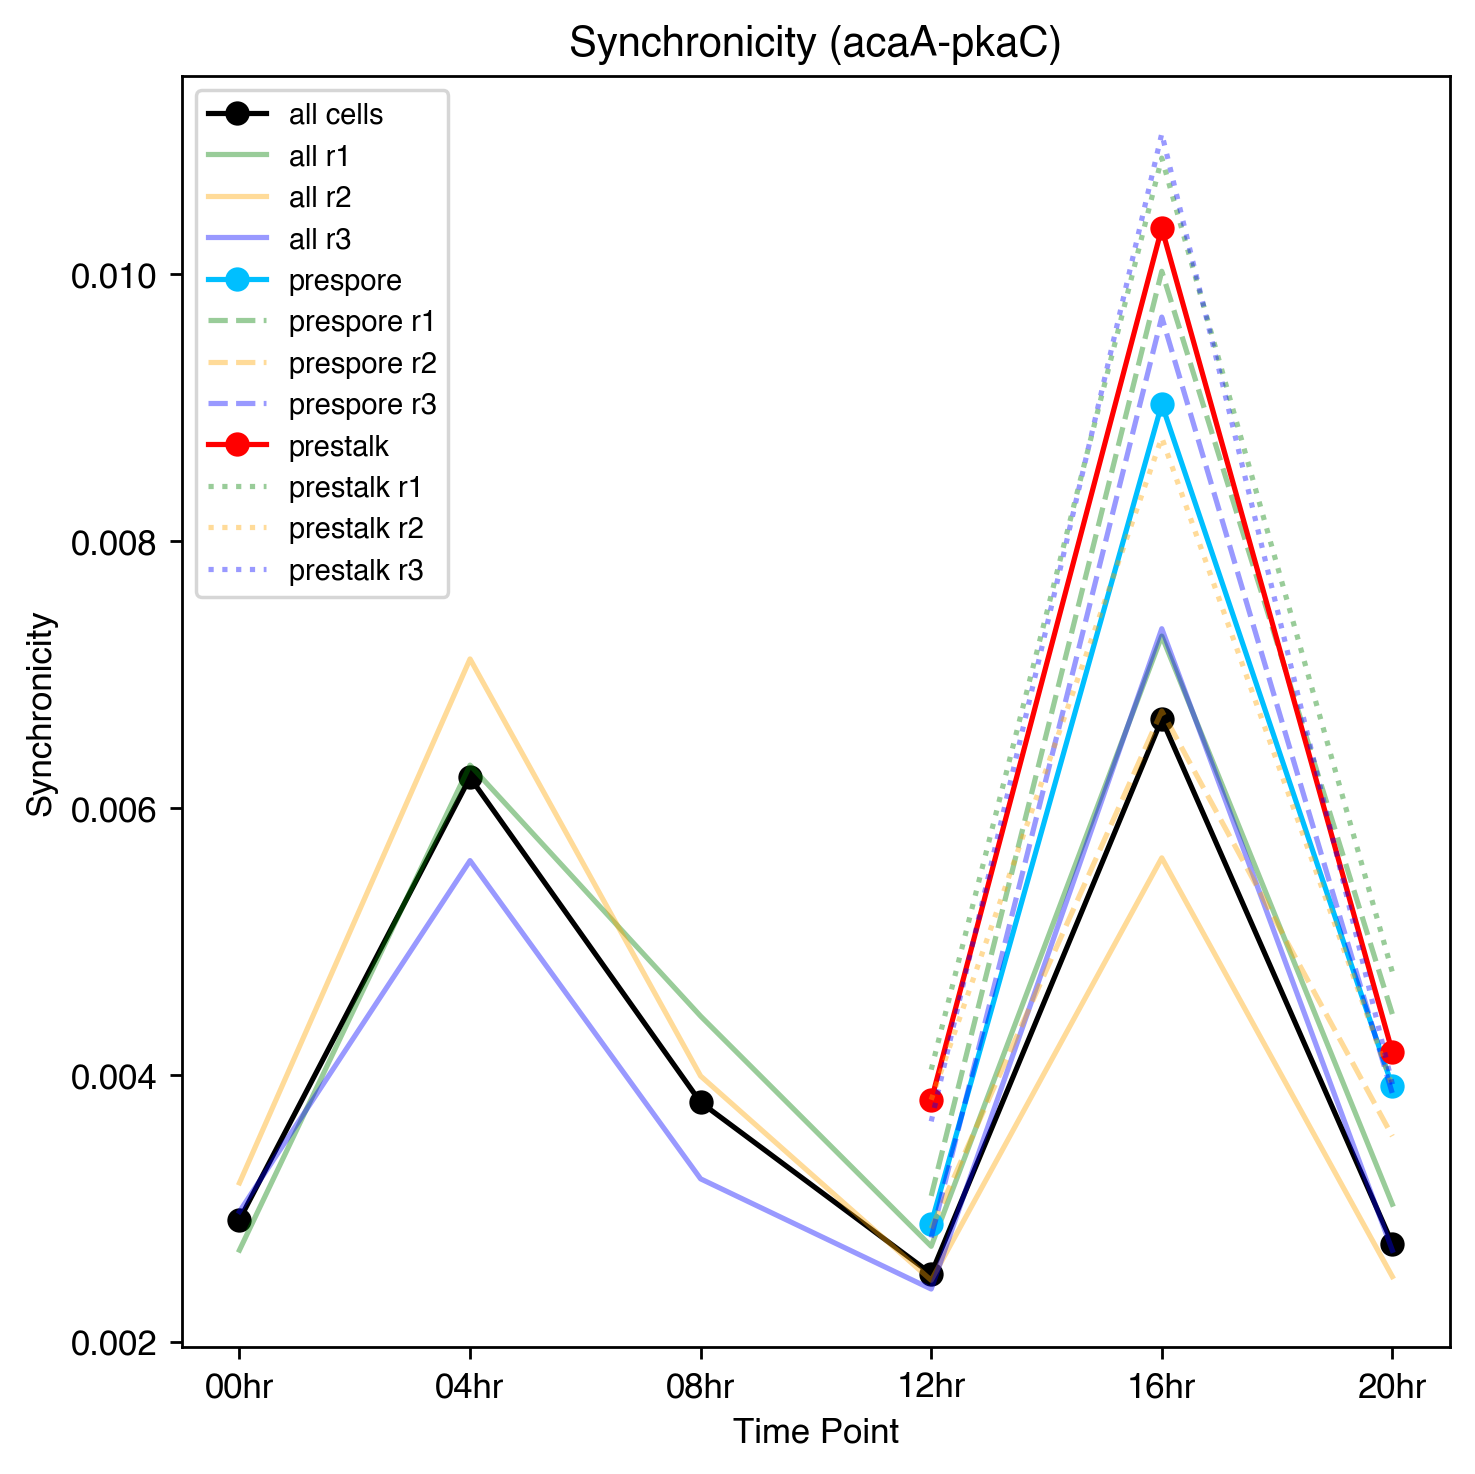

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(
    mean_distances_pca["AX4"]["all"].keys(),
    mean_distances_pca["AX4"]["all"].values(),
    label="AX4",
    color="black",
    marker="o",
)
ax.plot(
    mean_distances_pca["acaA"]["all"].keys(),
    mean_distances_pca["acaA"]["all"].values(),
    label="acaA-",
    color="black",
    linestyle="dotted",
    marker="o",
    markerfacecolor="none",
)
ax.plot(
    mean_distances_pca["AX4_psp"]["all"].keys(),
    mean_distances_pca["AX4_psp"]["all"].values(),
    label=f"AX4 prespore",
    color="deepskyblue",
    marker="o",
)
ax.plot(
    mean_distances_pca["AX4_pst"]["all"].keys(),
    mean_distances_pca["AX4_pst"]["all"].values(),
    label=f"AX4 prestalk",
    color="red",
    marker="o",
)
ax.plot(
    mean_distances_pca["acaA_pkaC"]["all"].keys(),
    mean_distances_pca["acaA_pkaC"]["all"].values(),
    label="acaA-pkaC",
    color="grey",
    marker="o",
    linestyle="dashed",
)
ax.plot(
    mean_distances_pca["acaA_pkaC_psp"]["all"].keys(),
    mean_distances_pca["acaA_pkaC_psp"]["all"].values(),
    label=f"acaA-pkaC prespore",
    color="deepskyblue",
    linestyle="dotted",
    marker="o",
    markerfacecolor="none",
)
ax.plot(
    mean_distances_pca["acaA_pkaC_pst"]["all"].keys(),
    mean_distances_pca["acaA_pkaC_pst"]["all"].values(),
    label=f"acaA-pkaC prestalk",
    color="red",
    linestyle="dotted",
    marker="o",
    markerfacecolor="none",
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Synchronicity")
ax.set_title("Synchronicity across all strains")
plt.legend(fontsize="small")
plt.tight_layout()
plt.savefig(f"figures/diversity_uce_pca.png", dpi=300)
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(
    mean_distances_pca["AX4"]["all"].keys(),
    mean_distances_pca["AX4"]["all"].values(),
    label="all cells",
    color="black",
    marker="o",
)
ax.plot(
    mean_distances_pca["AX4"]["act15GFP"].keys(),
    mean_distances_pca["AX4"]["act15GFP"].values(),
    label="all act15GFP",
    color="green",
    alpha=0.4,
)
ax.plot(
    mean_distances_pca["AX4"]["mCherry"].keys(),
    mean_distances_pca["AX4"]["mCherry"].values(),
    label="all mCherry",
    color="orange",
    alpha=0.4,
)
ax.plot(
    mean_distances_pca["AX4"]["mCerulean"].keys(),
    mean_distances_pca["AX4"]["mCerulean"].values(),
    label="all mCerulean",
    color="blue",
    alpha=0.4,
)
ax.plot(
    mean_distances_pca["AX4_psp"]["all"].keys(),
    mean_distances_pca["AX4_psp"]["all"].values(),
    label=f"prespore",
    color="deepskyblue",
    marker="o",
)
ax.plot(
    mean_distances_pca["AX4_psp"]["act15GFP"].keys(),
    mean_distances_pca["AX4_psp"]["act15GFP"].values(),
    label="prespore act15GFP",
    color="green",
    alpha=0.4,
    linestyle="dashed",
)   
ax.plot(
    mean_distances_pca["AX4_psp"]["mCherry"].keys(),
    mean_distances_pca["AX4_psp"]["mCherry"].values(),
    label="prespore mCherry",
    color="orange",
    alpha=0.4,
    linestyle="dashed",
)
ax.plot(
    mean_distances_pca["AX4_psp"]["mCerulean"].keys(),
    mean_distances_pca["AX4_psp"]["mCerulean"].values(),
    label="prespore mCerulean",
    color="blue",
    alpha=0.4,
    linestyle="dashed",
)
ax.plot(
    mean_distances_pca["AX4_pst"]["all"].keys(),
    mean_distances_pca["AX4_pst"]["all"].values(),
    label=f"prestalk",
    color="red",
    marker="o",
)
ax.plot(
    mean_distances_pca["AX4_pst"]["act15GFP"].keys(),
    mean_distances_pca["AX4_pst"]["act15GFP"].values(),
    label="prestalk act15GFP",
    color="green",
    alpha=0.4,
    linestyle="dotted",
)
ax.plot(
    mean_distances_pca["AX4_pst"]["mCherry"].keys(),
    mean_distances_pca["AX4_pst"]["mCherry"].values(),
    label="prestalk mCherry",
    color="orange",
    alpha=0.4,
    linestyle="dotted",
)
ax.plot(
    mean_distances_pca["AX4_pst"]["mCerulean"].keys(),
    mean_distances_pca["AX4_pst"]["mCerulean"].values(),
    label="prestalk mCerulean",
    color="blue",
    alpha=0.4,
    linestyle="dotted",
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Synchronicity")
ax.set_title("Synchronicity (AX4)")
plt.legend(fontsize="small")
plt.tight_layout()
plt.savefig(f"figures/diversity_uce_ax4_pca.png", dpi=300)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(
    mean_distances_pca["acaA"]["all"].keys(),
    mean_distances_pca["acaA"]["all"].values(),
    label="all cells",
    color="black",
    marker="o",
)
ax.plot(
    mean_distances_pca["acaA"]["act15GFP"].keys(),
    mean_distances_pca["acaA"]["act15GFP"].values(),
    label="act15GFP",
    color="green",
    alpha=0.4,
)
ax.plot(
    mean_distances_pca["acaA"]["mCherry"].keys(),
    mean_distances_pca["acaA"]["mCherry"].values(),
    label="mCherry",
    color="orange",
    alpha=0.4,
)
ax.plot(
    mean_distances_pca["acaA"]["mCerulean"].keys(),
    mean_distances_pca["acaA"]["mCerulean"].values(),
    label="mCerulean",
    color="blue",
    alpha=0.4,
)
ax.plot(
    mean_distances_pca["acaA"]["mNeonG"].keys(),
    mean_distances_pca["acaA"]["mNeonG"].values(),
    label="mNeonG",
    color="turquoise",
    alpha=0.4,
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Synchronicity")
ax.set_title("Synchronicity (acaA-)")

plt.legend(fontsize="small")
plt.tight_layout()
plt.savefig(f"figures/diversity_uce_acaA_pca.png", dpi=300)
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(
    mean_distances_pca["acaA_pkaC"]["all"].keys(),
    mean_distances_pca["acaA_pkaC"]["all"].values(),
    label="all cells",
    color="black",
    marker="o",
)
ax.plot(
    mean_distances_pca["acaA_pkaC"]["r1"].keys(),
    mean_distances_pca["acaA_pkaC"]["r1"].values(),
    label="all r1",
    color="green",
    alpha=0.4,
)
ax.plot(
    mean_distances_pca["acaA_pkaC"]["r2"].keys(),
    mean_distances_pca["acaA_pkaC"]["r2"].values(),
    label="all r2",
    color="orange",
    alpha=0.4,
)
ax.plot(
    mean_distances_pca["acaA_pkaC"]["r3"].keys(),
    mean_distances_pca["acaA_pkaC"]["r3"].values(),
    label="all r3",
    color="blue",
    alpha=0.4,
)
ax.plot(
    mean_distances_pca["acaA_pkaC_psp"]["all"].keys(),
    mean_distances_pca["acaA_pkaC_psp"]["all"].values(),
    label=f"prespore",
    color="deepskyblue",
    marker="o",
)
ax.plot(
    mean_distances_pca["acaA_pkaC_psp"]["r1"].keys(),
    mean_distances_pca["acaA_pkaC_psp"]["r1"].values(),
    label="prespore r1",
    color="green",
    alpha=0.4,
    linestyle="dashed",
)
ax.plot(
    mean_distances_pca["acaA_pkaC_psp"]["r2"].keys(),
    mean_distances_pca["acaA_pkaC_psp"]["r2"].values(),
    label="prespore r2",
    color="orange",
    alpha=0.4,
    linestyle="dashed",
)
ax.plot(
    mean_distances_pca["acaA_pkaC_psp"]["r3"].keys(),
    mean_distances_pca["acaA_pkaC_psp"]["r3"].values(),
    label="prespore r3",
    color="blue",
    alpha=0.4,
    linestyle="dashed",
)
ax.plot(
    mean_distances_pca["acaA_pkaC_pst"]["all"].keys(),
    mean_distances_pca["acaA_pkaC_pst"]["all"].values(),
    label=f"prestalk",
    color="red",
    marker="o",
)
ax.plot(
    mean_distances_pca["acaA_pkaC_pst"]["r1"].keys(),
    mean_distances_pca["acaA_pkaC_pst"]["r1"].values(),
    label="prestalk r1",
    color="green",
    alpha=0.4,
    linestyle="dotted",
)
ax.plot(
    mean_distances_pca["acaA_pkaC_pst"]["r2"].keys(),
    mean_distances_pca["acaA_pkaC_pst"]["r2"].values(),
    label="prestalk r2",
    color="orange",
    alpha=0.4,
    linestyle="dotted",
)
ax.plot(
    mean_distances_pca["acaA_pkaC_pst"]["r3"].keys(),
    mean_distances_pca["acaA_pkaC_pst"]["r3"].values(),
    label="prestalk r3",
    color="blue",
    alpha=0.4,
    linestyle="dotted",
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Synchronicity")
ax.set_title("Synchronicity (acaA-pkaC)")

plt.legend(fontsize="small")
plt.tight_layout()
plt.savefig(f"figures/diversity_uce_acaA_pkaC_pca.png", dpi=300)
plt.show()

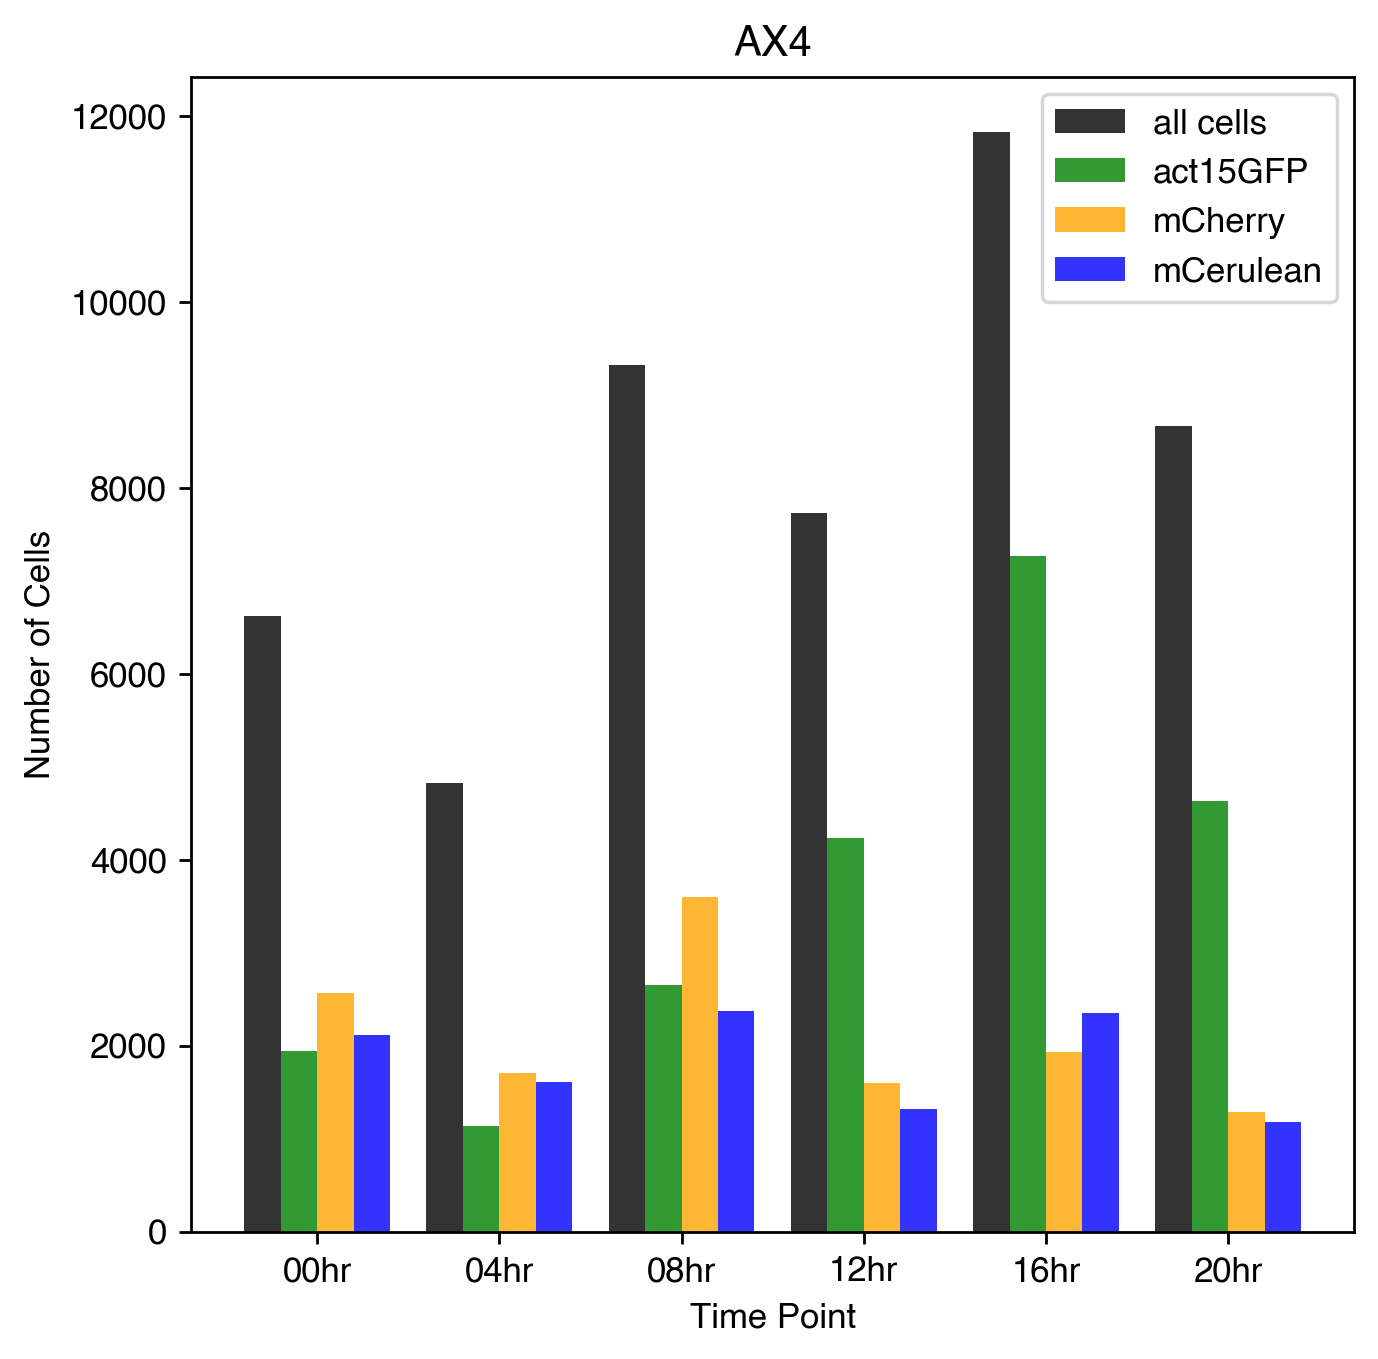

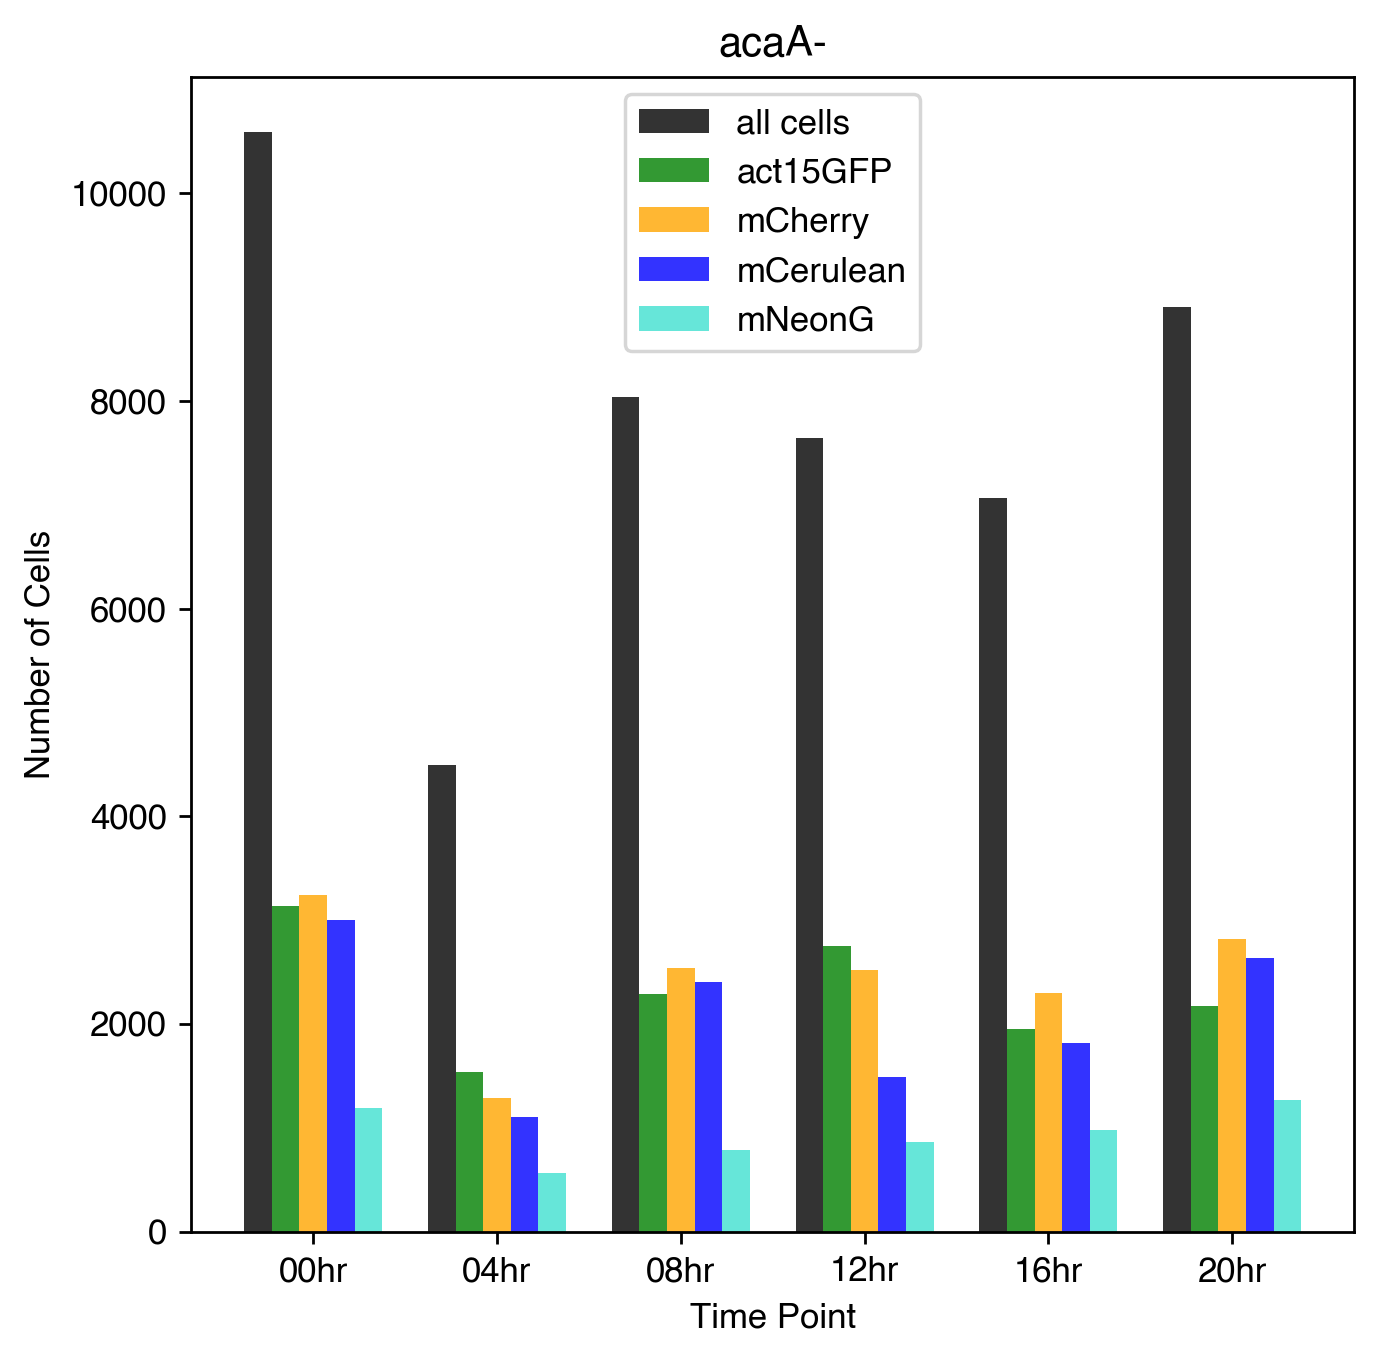

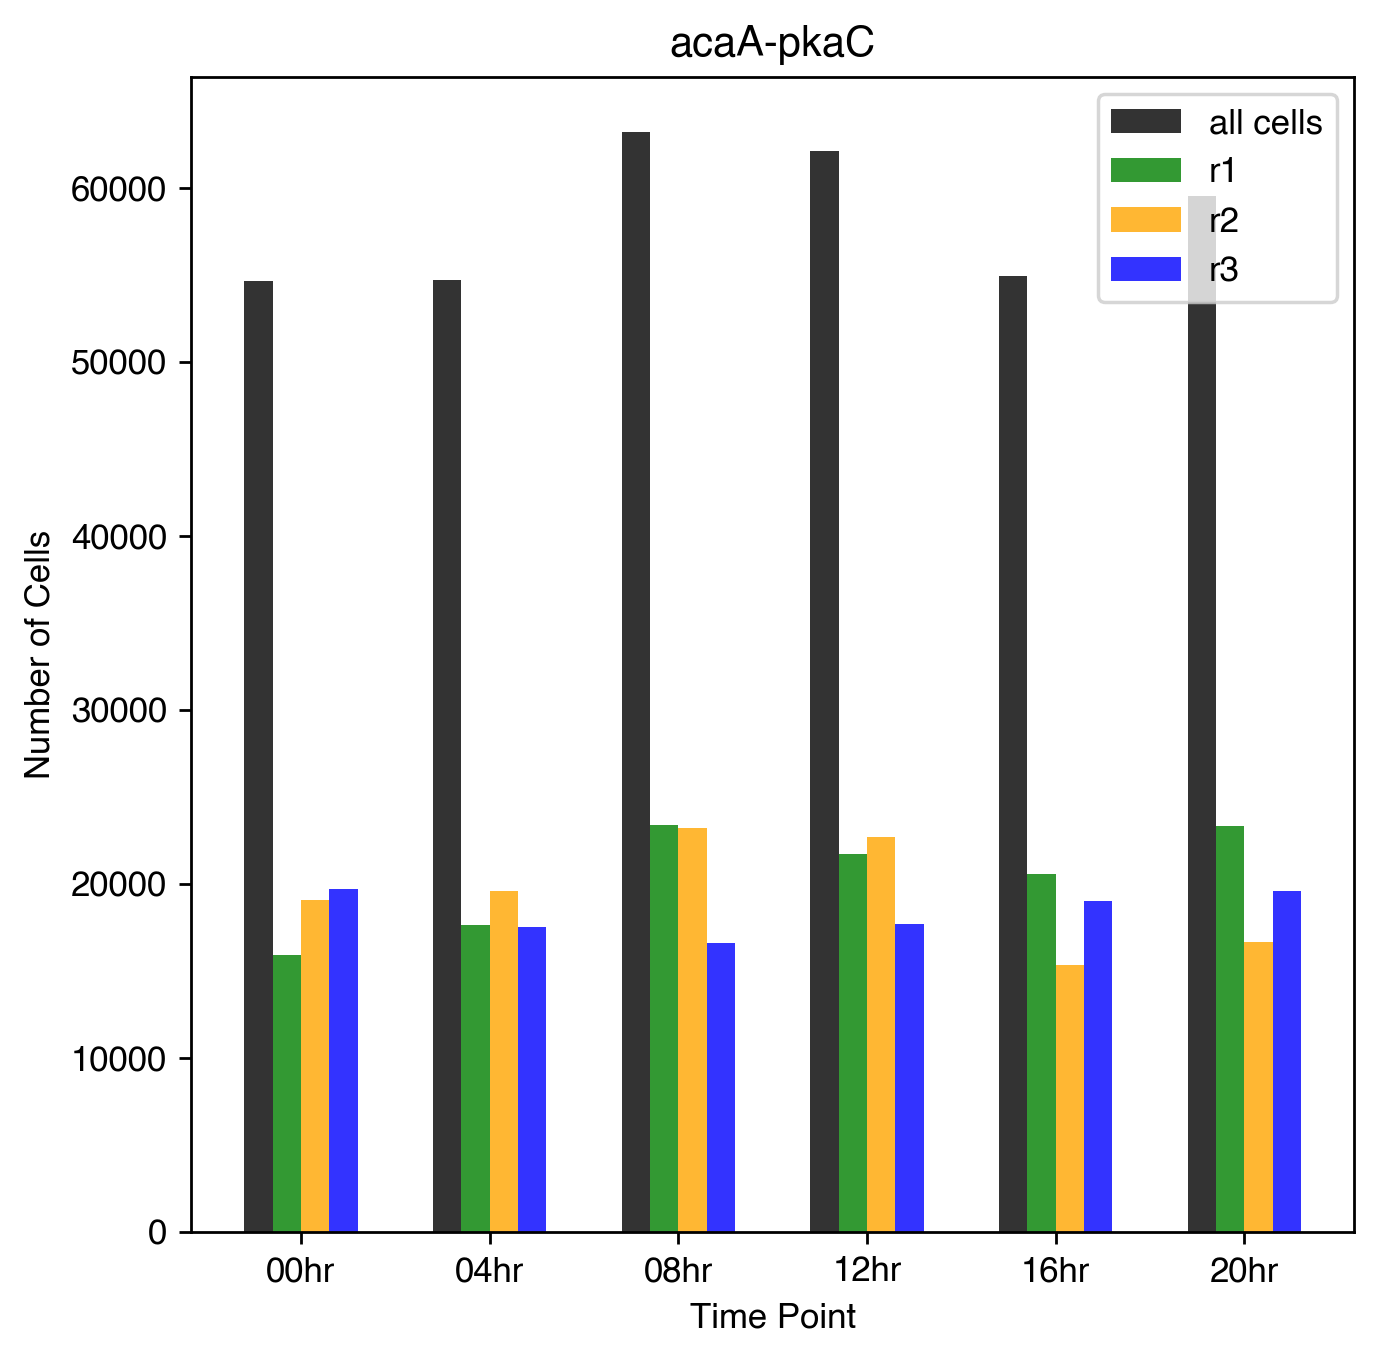

In [31]:
keys = list(cell_counts["AX4"]["all"].keys())
x = np.arange(len(keys))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.bar(
    x - 1.5 * width,
    cell_counts["AX4"]["all"].values(),
    width,
    label="all cells",
    color="black",
    alpha=0.8,
)

ax.bar(
    x - 0.5 * width,
    cell_counts["AX4"]["act15GFP"].values(),
    width,
    label="act15GFP",
    color="green",
    alpha=0.8,
)
ax.bar(
    x + 0.5 * width,
    cell_counts["AX4"]["mCherry"].values(),
    width,
    label="mCherry",
    color="orange",
    alpha=0.8,
)
ax.bar(
    x + 1.5 * width,
    cell_counts["AX4"]["mCerulean"].values(),
    width,
    label="mCerulean",
    color="blue",
    alpha=0.8,
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Number of Cells")
ax.set_xticks(x)
ax.set_xticklabels(keys)
ax.legend()
plt.title("AX4")
plt.savefig(f"figures/diversity_uce_ax4_counts.png", dpi=300)
plt.show()

keys = list(cell_counts["acaA"]["all"].keys())
x = np.arange(len(keys))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.bar(
    x - 2 * width,
    cell_counts["acaA"]["all"].values(),
    width,
    label="all cells",
    color="black",
    alpha=0.8,
)
ax.bar(
    x - 1 * width,
    cell_counts["acaA"]["act15GFP"].values(),
    width,
    label="act15GFP",
    color="green",
    alpha=0.8,
)
ax.bar(
    x + 0 * width,
    cell_counts["acaA"]["mCherry"].values(),
    width,
    label="mCherry",
    color="orange",
    alpha=0.8,
)
ax.bar(
    x + 1 * width,
    cell_counts["acaA"]["mCerulean"].values(),
    width,
    label="mCerulean",
    color="blue",
    alpha=0.8,
)
ax.bar(
    x + 2 * width,
    cell_counts["acaA"]["mNeonG"].values(),
    width,
    label="mNeonG",
    color="turquoise",
    alpha=0.8,
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Number of Cells")
ax.set_xticks(x)
ax.set_xticklabels(keys)
ax.legend()
plt.title("acaA-")
plt.savefig(f"figures/diversity_uce_acaA_counts.png", dpi=300)
plt.show()

keys = list(cell_counts["acaA_pkaC"]["all"].keys())
x = np.arange(len(keys))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.bar(
    x - 1.5 * width,
    cell_counts["acaA_pkaC"]["all"].values(),
    width,
    label="all cells",
    color="black",
    alpha=0.8,
)

ax.bar(
    x - 0.5 * width,
    cell_counts["acaA_pkaC"]["r1"].values(),
    width,
    label="r1",
    color="green",
    alpha=0.8,
)
ax.bar(
    x + 0.5 * width,
    cell_counts["acaA_pkaC"]["r2"].values(),
    width,
    label="r2",
    color="orange",
    alpha=0.8,
)
ax.bar(
    x + 1.5 * width,
    cell_counts["acaA_pkaC"]["r3"].values(),
    width,
    label="r3",
    color="blue",
    alpha=0.8,
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Number of Cells")
ax.set_xticks(x)
ax.set_xticklabels(keys)
ax.legend()
plt.title("acaA-pkaC")
plt.savefig(f"figures/diversity_uce_acaA_pkaC_counts.png", dpi=300)
plt.show()

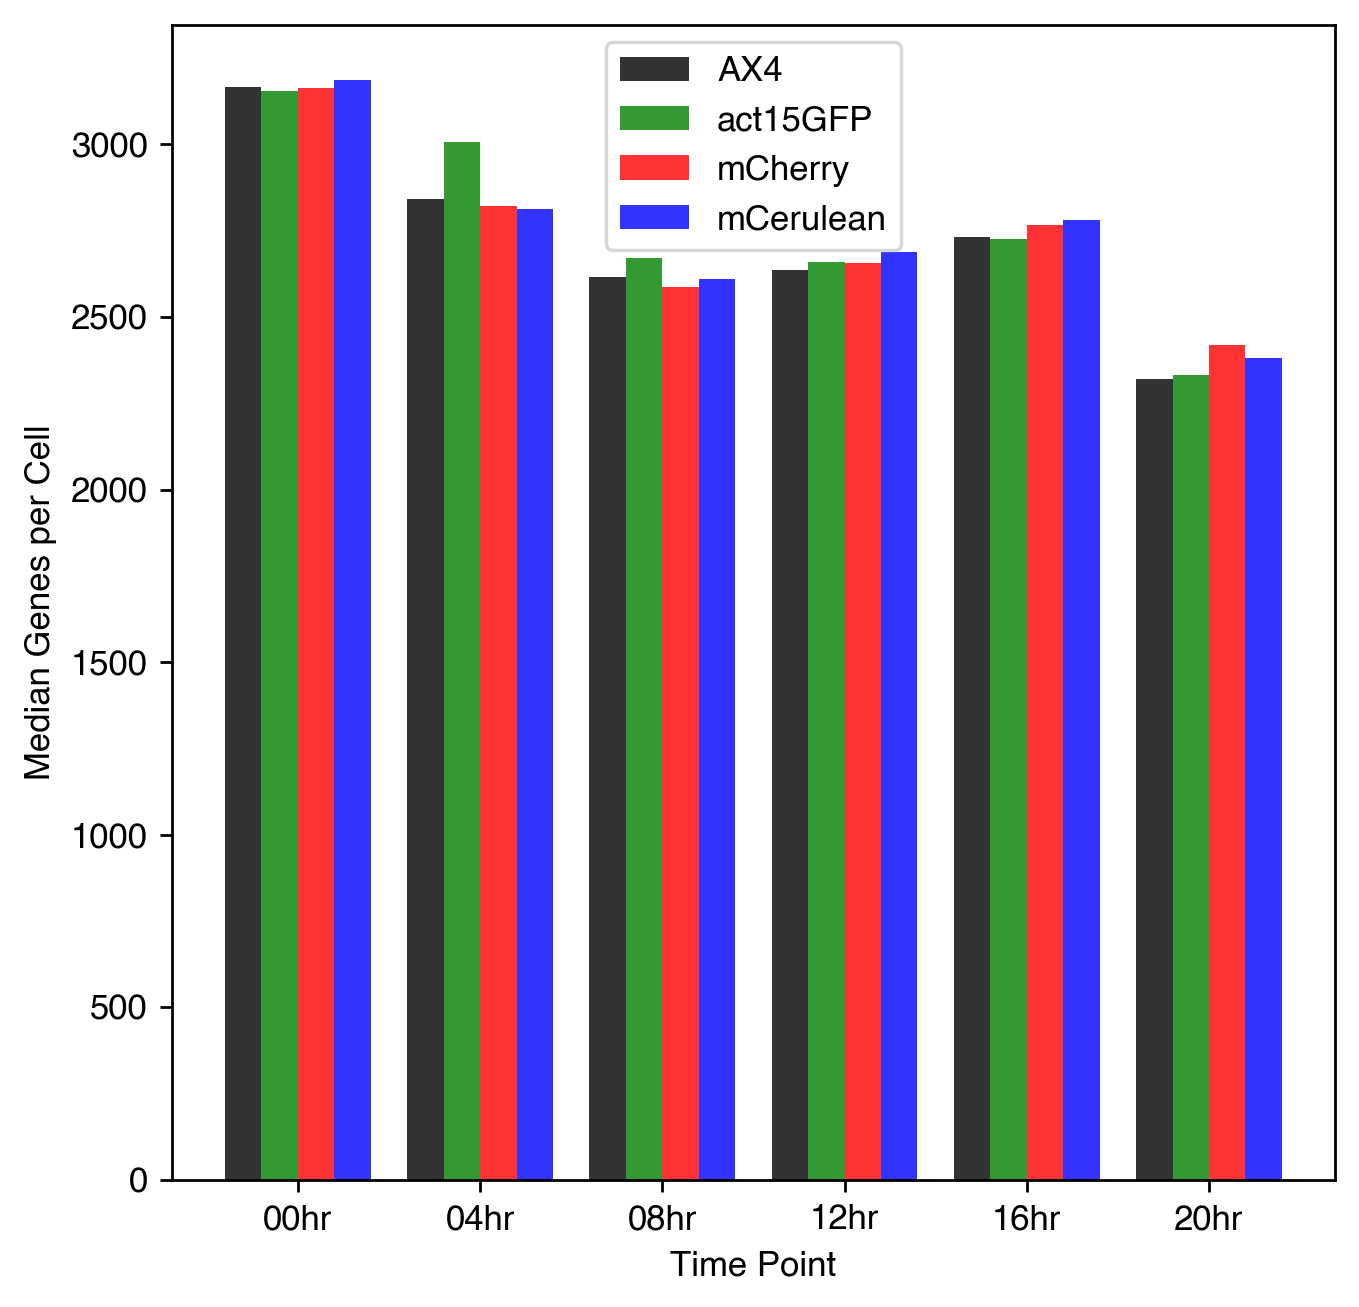

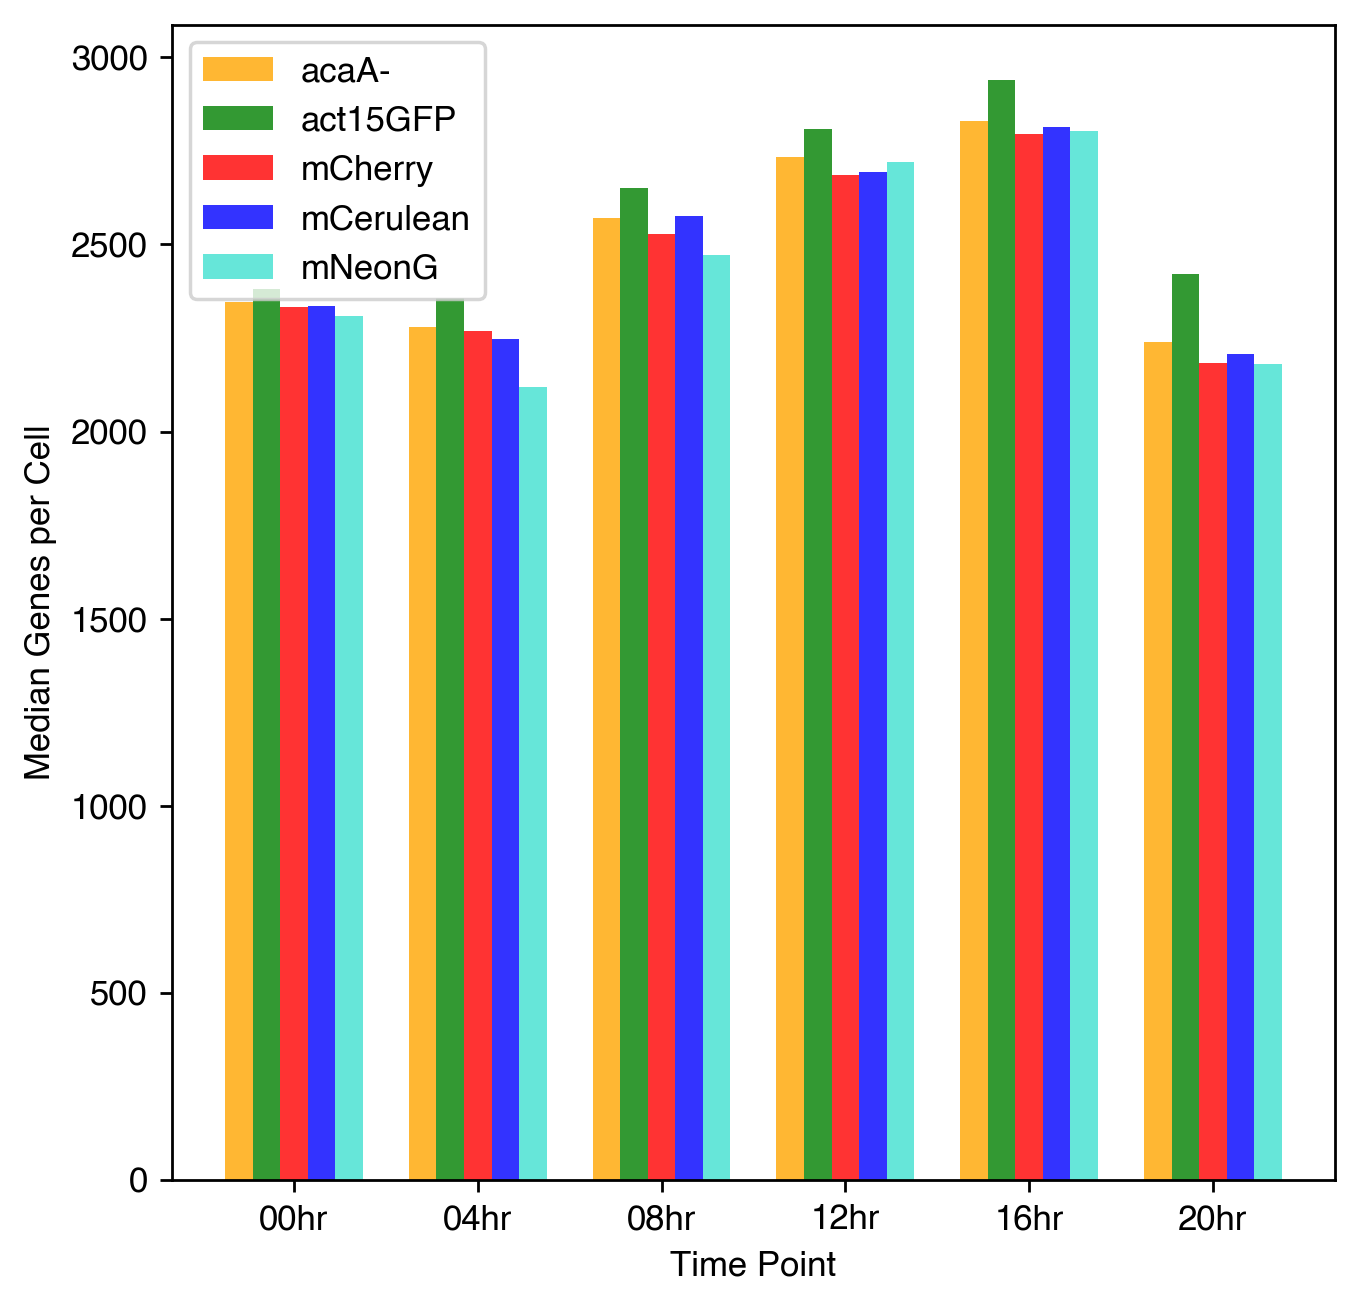

In [32]:
keys = list(median_genes["AX4"]["all"].keys())
x = np.arange(len(keys))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.bar(
    x - 1.5 * width,
    median_genes["AX4"]["all"].values(),
    width,
    label="AX4",
    color="black",
    alpha=0.8,
)

ax.bar(
    x - 0.5 * width,
    median_genes["AX4"]["act15GFP"].values(),
    width,
    label="act15GFP",
    color="green",
    alpha=0.8,
)
ax.bar(
    x + 0.5 * width,
    median_genes["AX4"]["mCherry"].values(),
    width,
    label="mCherry",
    color="red",
    alpha=0.8,
)
ax.bar(
    x + 1.5 * width,
    median_genes["AX4"]["mCerulean"].values(),
    width,
    label="mCerulean",
    color="blue",
    alpha=0.8,
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Median Genes per Cell")
ax.set_xticks(x)
ax.set_xticklabels(keys)
ax.legend()
plt.savefig(f"figures/diversity_uce_ax4_median_genes.png", dpi=300)
plt.show()

keys = list(median_genes["acaA"]["all"].keys())
x = np.arange(len(keys))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.bar(
    x - 2 * width,
    median_genes["acaA"]["all"].values(),
    width,
    label="acaA-",
    color="orange",
    alpha=0.8,
)
ax.bar(
    x - 1 * width,
    median_genes["acaA"]["act15GFP"].values(),
    width,
    label="act15GFP",
    color="green",
    alpha=0.8,
)
ax.bar(
    x + 0 * width,
    median_genes["acaA"]["mCherry"].values(),
    width,
    label="mCherry",
    color="red",
    alpha=0.8,
)
ax.bar(
    x + 1 * width,
    median_genes["acaA"]["mCerulean"].values(),
    width,
    label="mCerulean",
    color="blue",
    alpha=0.8,
)
ax.bar(
    x + 2 * width,
    median_genes["acaA"]["mNeonG"].values(),
    width,
    label="mNeonG",
    color="turquoise",
    alpha=0.8,
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Median Genes per Cell")
ax.set_xticks(x)
ax.set_xticklabels(keys)
ax.legend()
plt.savefig(f"figures/diversity_uce_acaA_median_genes.png", dpi=300)
plt.show()

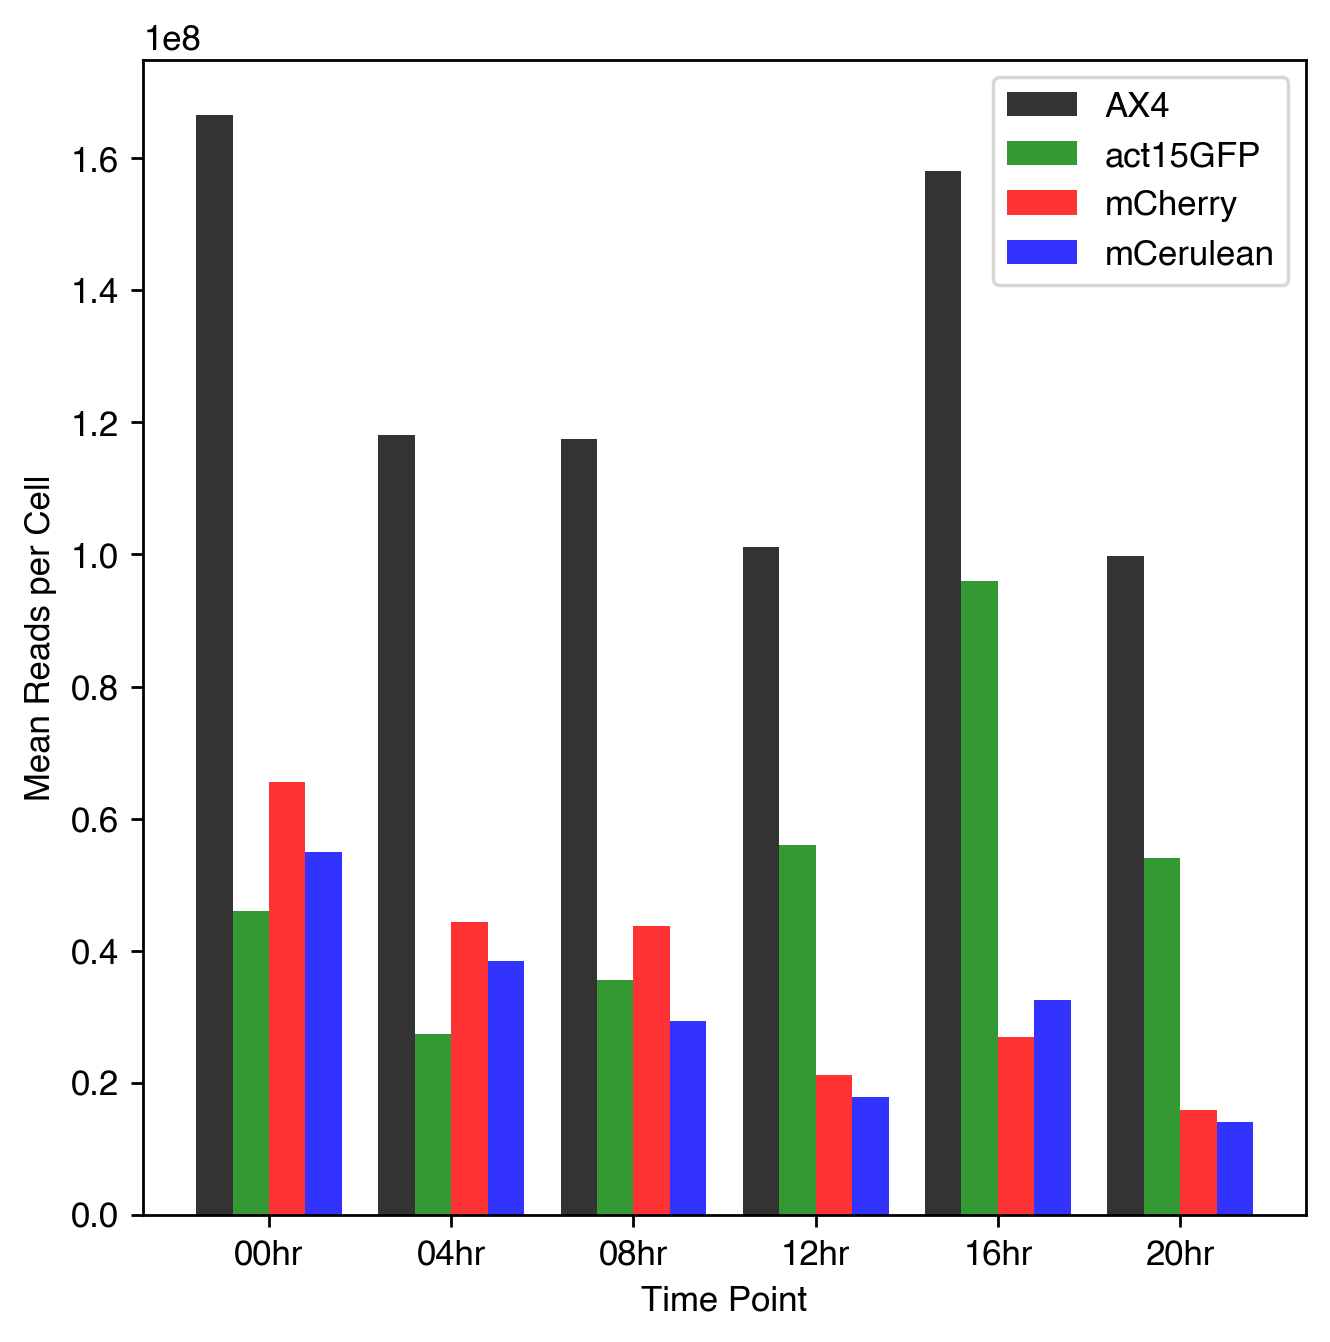

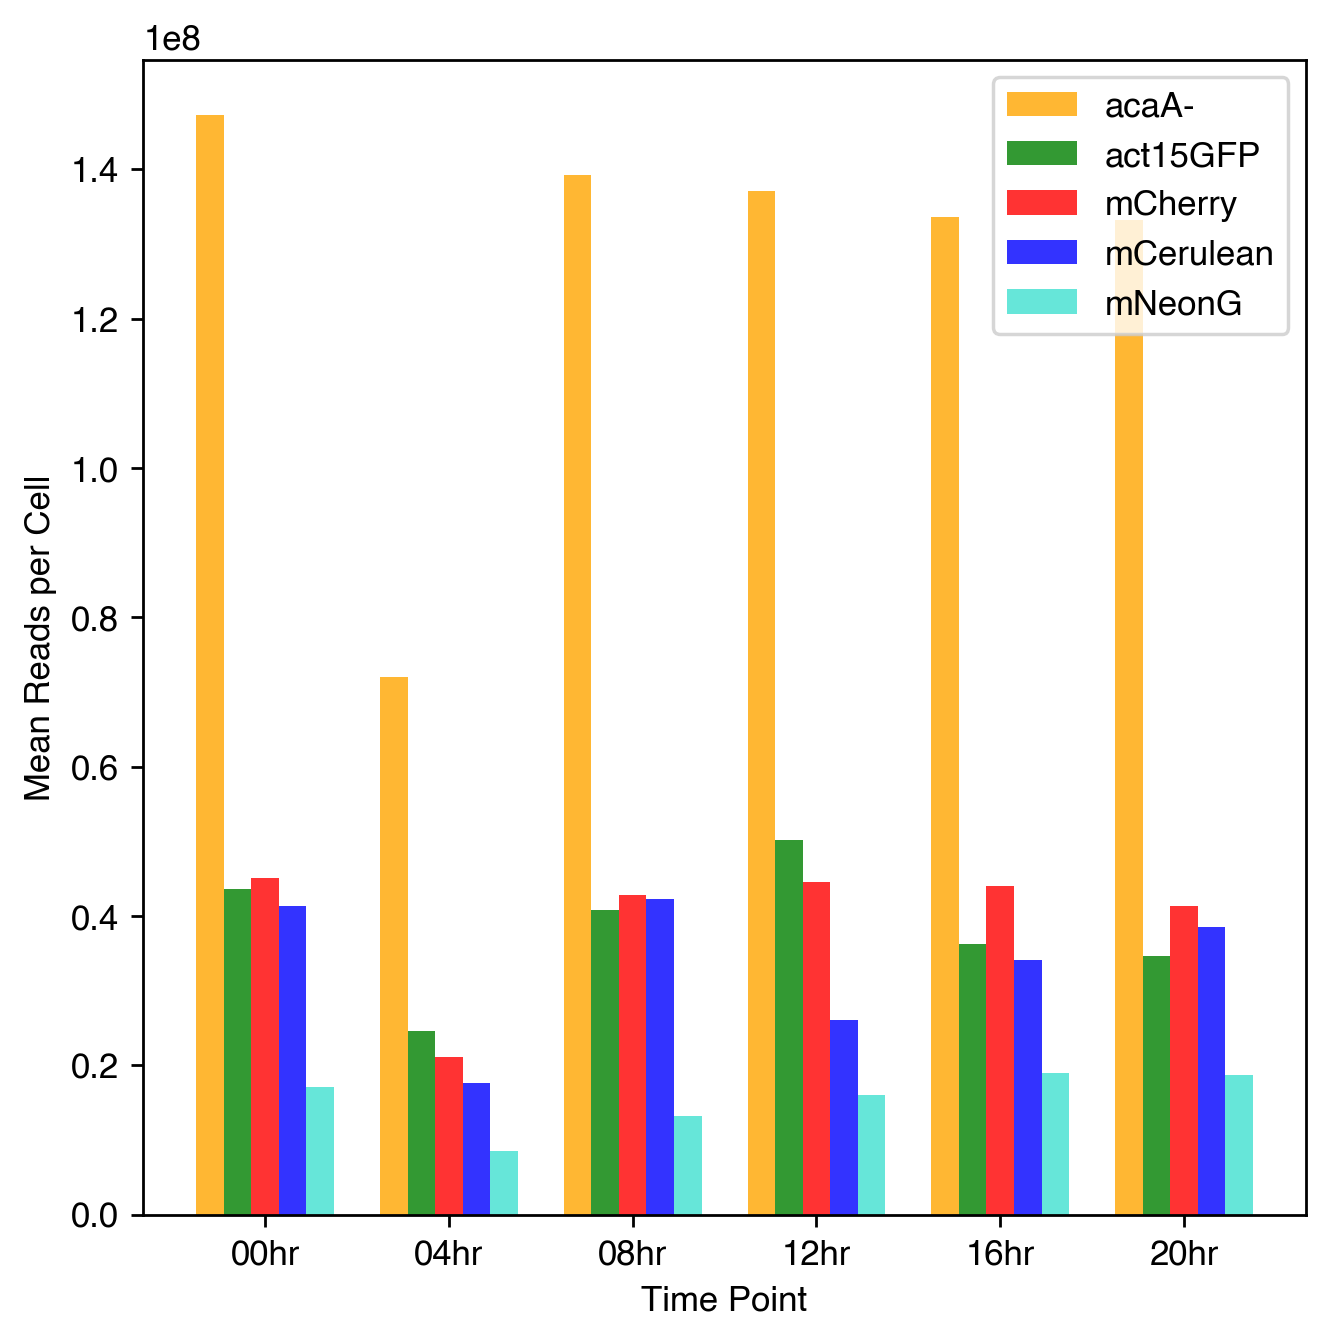

In [33]:
keys = list(total_reads["AX4"]["all"].keys())
x = np.arange(len(keys))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.bar(
    x - 1.5 * width,
    total_reads["AX4"]["all"].values(),
    width,
    label="AX4",
    color="black",
    alpha=0.8,
)

ax.bar(
    x - 0.5 * width,
    total_reads["AX4"]["act15GFP"].values(),
    width,
    label="act15GFP",
    color="green",
    alpha=0.8,
)
ax.bar(
    x + 0.5 * width,
    total_reads["AX4"]["mCherry"].values(),
    width,
    label="mCherry",
    color="red",
    alpha=0.8,
)
ax.bar(
    x + 1.5 * width,
    total_reads["AX4"]["mCerulean"].values(),
    width,
    label="mCerulean",
    color="blue",
    alpha=0.8,
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Mean Reads per Cell")
ax.set_xticks(x)
ax.set_xticklabels(keys)
ax.legend()
plt.savefig(f"figures/diversity_uce_ax4_total_reads.png", dpi=300)
plt.show()

keys = list(total_reads["AX4"]["all"].keys())
x = np.arange(len(keys))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.bar(
    x - 2 * width,
    total_reads["acaA"]["all"].values(),
    width,
    label="acaA-",
    color="orange",
    alpha=0.8,
)
ax.bar(
    x - 1 * width,
    total_reads["acaA"]["act15GFP"].values(),
    width,
    label="act15GFP",
    color="green",
    alpha=0.8,
)
ax.bar(
    x + 0 * width,
    total_reads["acaA"]["mCherry"].values(),
    width,
    label="mCherry",
    color="red",
    alpha=0.8,
)
ax.bar(
    x + 1 * width,
    total_reads["acaA"]["mCerulean"].values(),
    width,
    label="mCerulean",
    color="blue",
    alpha=0.8,
)
ax.bar(
    x + 2 * width,
    total_reads["acaA"]["mNeonG"].values(),
    width,
    label="mNeonG",
    color="turquoise",
    alpha=0.8,
)
ax.set_xlabel("Time Point")
ax.set_ylabel("Mean Reads per Cell")
ax.set_xticks(x)
ax.set_xticklabels(keys)
ax.legend()
plt.savefig(f"figures/diversity_uce_acaA_total_reads.png", dpi=300)
plt.show()